In [1]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=fefb4a0df7be14e5fd3eab5644ca96505a1f1f98570e13eeb3816089b8877c6d
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [2]:
#Loading the required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/lokvenkatesh/INFO6100/main/Breast%20Cancer%20Detection%20Dataset%20(1).csv"
)

This code uses the pandas library to read a CSV file from a GitHub repository using the pd.read_csv() function, converting it into a DataFrame for easier data handling and analysis in Python.

In [11]:
data.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [12]:

data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [13]:
# checking if the any data is missing
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Text(0, 0.5, 'Diagnosis')

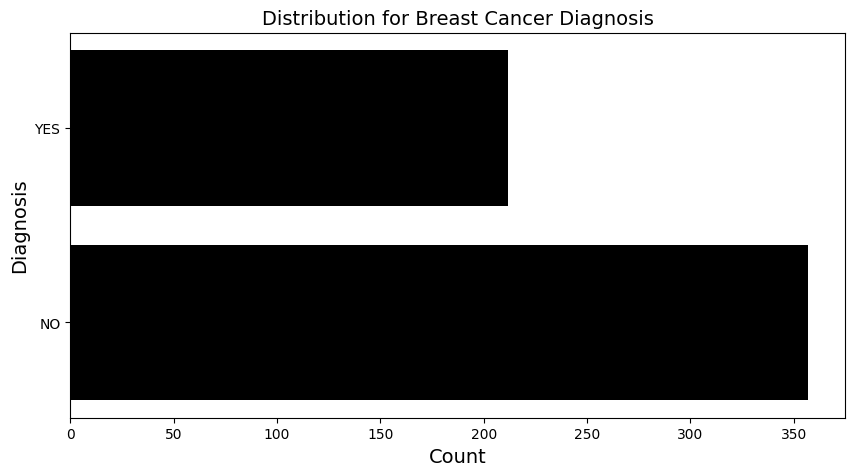

In [14]:
#Checking if diagnosis has only M and B (binary)
data['diagnosis'].value_counts()

#Plotting the distribution for Diagnosis
plt.figure(figsize=(10,5))
plt.barh(['NO', 'YES'], data['diagnosis'].value_counts(), color ="#000000")
plt.title('Distribution for Breast Cancer Diagnosis', size =14)
plt.xlabel("Count", size =14)
plt.ylabel("Diagnosis", size =14)

The 'LUNG_CANCER' column holds data: YES AND NO (LUNG CANCER)

# **What are the data types?**

In [15]:
# Checking the data types of each column
data.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [30]:
df = pd.DataFrame(data)

# Replace 'B' with 'no' in 'diagnosis'
df['diagnosis'] = df['diagnosis'].replace('B', 'No')

# Replace 'M' with 'yes' in 'diagnosis'
df['diagnosis'] = df['diagnosis'].replace('M', 'Yes')

# Print the updated DataFrame


In [22]:
data.head(15)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302       Yes        17.99         10.38          122.80     1001.0   
1     842517       Yes        20.57         17.77          132.90     1326.0   
2   84300903       Yes        19.69         21.25          130.00     1203.0   
3   84348301       Yes        11.42         20.38           77.58      386.1   
4   84358402       Yes        20.29         14.34          135.10     1297.0   
5     843786       Yes        12.45         15.70           82.57      477.1   
6     844359       Yes        18.25         19.98          119.60     1040.0   
7   84458202       Yes        13.71         20.83           90.20      577.9   
8     844981       Yes        13.00         21.82           87.50      519.8   
9   84501001       Yes        12.46         24.04           83.97      475.9   
10    845636       Yes        16.02         23.24          102.70      797.8   
11  84610002       Yes        15.78         17.89          103.60      781.0   
12    846226       Yes        19.17         24.80          132.40     1123.0   
13    846381       Yes        15.85         23.95          103.70      782.7   
14  84667401       Yes        13.73         22.61           93.60      578.3   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   

    ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0   ...         25.38          17.33           184.60      2019.0   
1   ...         24.99          23.41           158.80      1956.0   
2   ...         23.57          25.53           152.50      1709.0   
3   ...         14.91          26.50            98.87       567.7   
4   ...         22.54          16.67           152.20      1575.0   
5   ...         15.47          23.75           103.40       741.6   
6   ...         22.88          27.66           153.20      1606.0   
7   ...         17.06          28.14           110.60       897.0   
8   ...         15.49          30.73           106.20       739.3   
9   ...         15.09          40.68            97.65       711.4   
10  ...         19.19          33.88           123.80      1150.0   
11  ...         20.42          27.28           136.50      1299.0   
12  ...         20.96          29.94           151.70      1332.0   
13  ...         16.84          27.66           112.00       876.5   
14  ...         15.03          32.01           108.80       697.7   

    smoothness_worst  compactness_worst  concavity_worst  \
0             0.1622             0.6656           0.7119   
1             0.1238             0.1866           0.2416   
2             0.1444             0.4245           0.4504   
3             0.2098             0.8663           0.6869   
4             0.1374             0.2050           0.4000   
5             0

Observations:
Now, the 'diagnosis' column contains categorical values 'Yes' (for malignant) and 'No' (for benign), simplifying analysis.

In [27]:

#Getting the list of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


#Getting the list of numerical columns
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()

In [29]:
def print_column_details(title, column_list):

    print(f"                 {title}                  ")
    print("*--------------------------------------------------------*")
    print(f'Total number of {title.lower()} in our dataset: {len(column_list)}')
    for index, column in enumerate(column_list, start=1):
        print(f'{index}. {column}')
    print("\n")

# Assuming 'categorical_cols' and 'numerical_cols' are predefined lists
# categorical_cols = [...]
# numerical_cols = [...]

# Print details of categorical and numerical columns
print_column_details("Categorical Variables", categorical_columns)
print_column_details("Numerical Variables", numerical_columns)

                 Categorical Variables                  
*--------------------------------------------------------*
Total number of categorical variables in our dataset: 1
1. diagnosis


                 Numerical Variables                  
*--------------------------------------------------------*
Total number of numerical variables in our dataset: 31
1. id
2. radius_mean
3. texture_mean
4. perimeter_mean
5. area_mean
6. smoothness_mean
7. compactness_mean
8. concavity_mean
9. concave points_mean
10. symmetry_mean
11. fractal_dimension_mean
12. radius_se
13. texture_se
14. perimeter_se
15. area_se
16. smoothness_se
17. compactness_se
18. concavity_se
19. concave points_se
20. symmetry_se
21. fractal_dimension_se
22. radius_worst
23. texture_worst
24. perimeter_worst
25. area_worst
26. smoothness_worst
27. compactness_worst
28. concavity_worst
29. concave points_worst
30. symmetry_worst
31. fractal_dimension_worst




### **Are there missing values?**

In [31]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

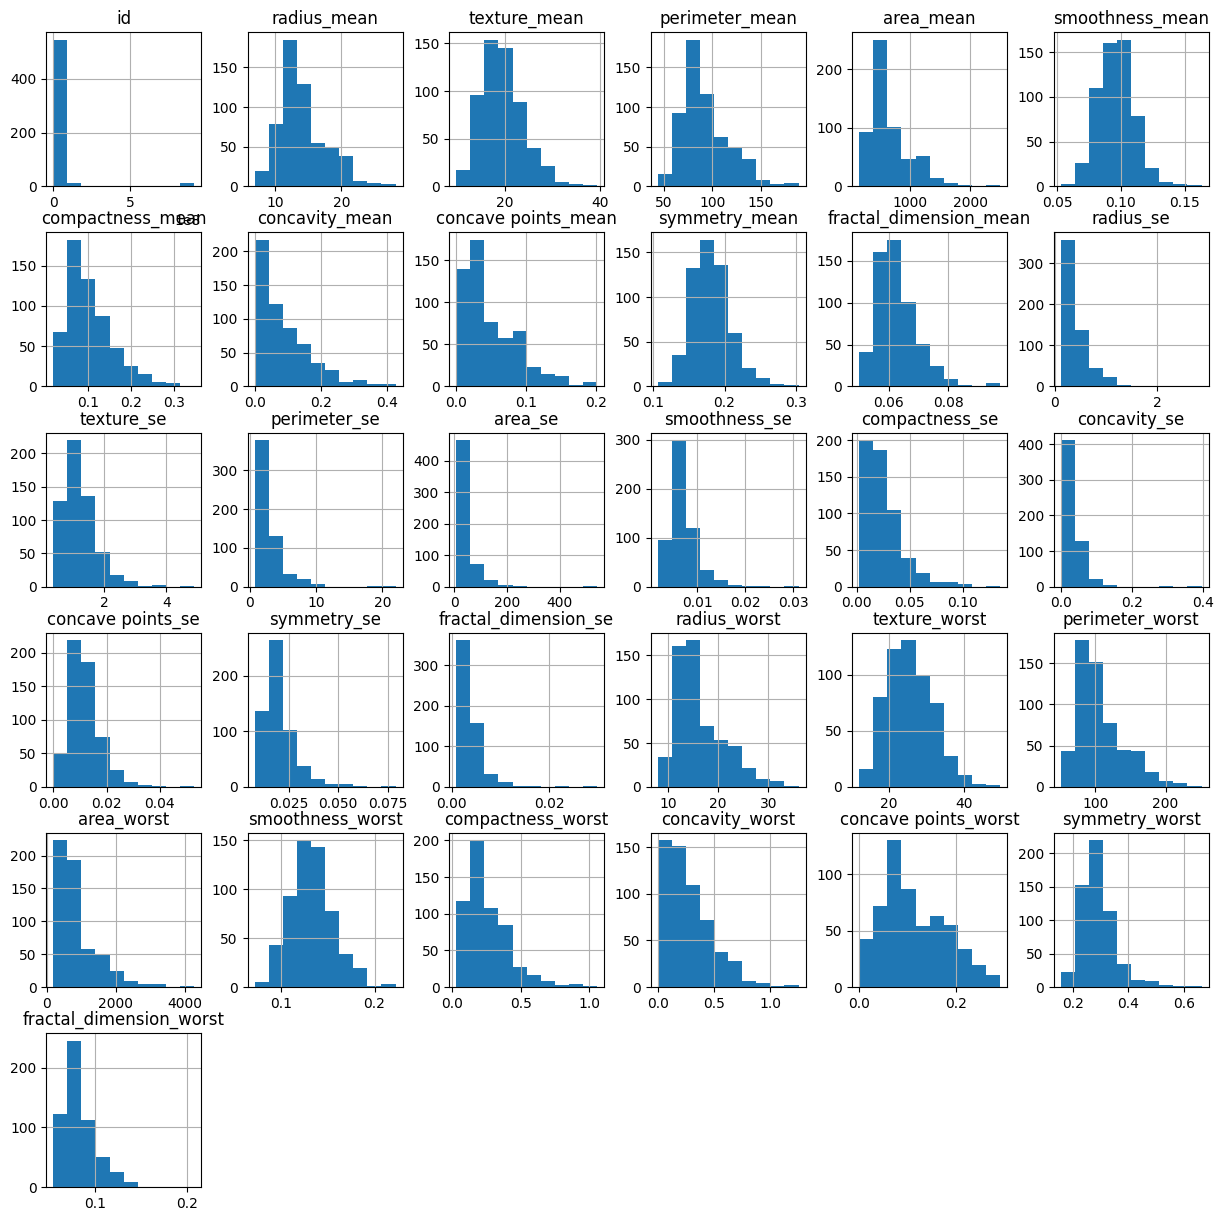

In [34]:

#generating histograms
plot = data.hist(figsize=(15,15))

In [57]:
datafinal = data.drop('diagnosis', axis=1)


### **What are the distributions of the predictor variables?**

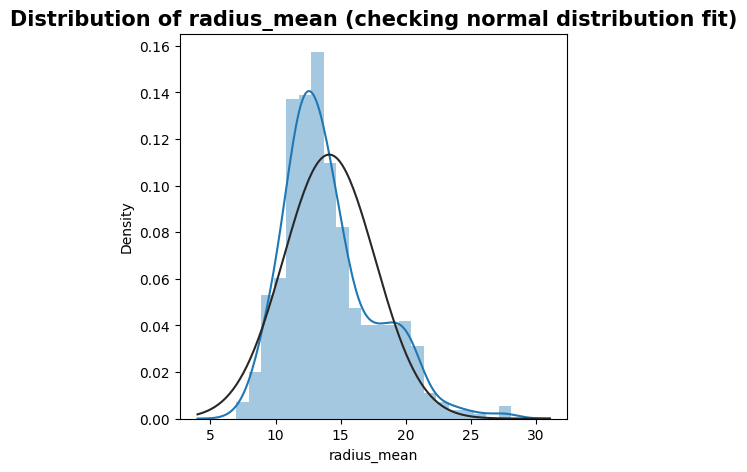

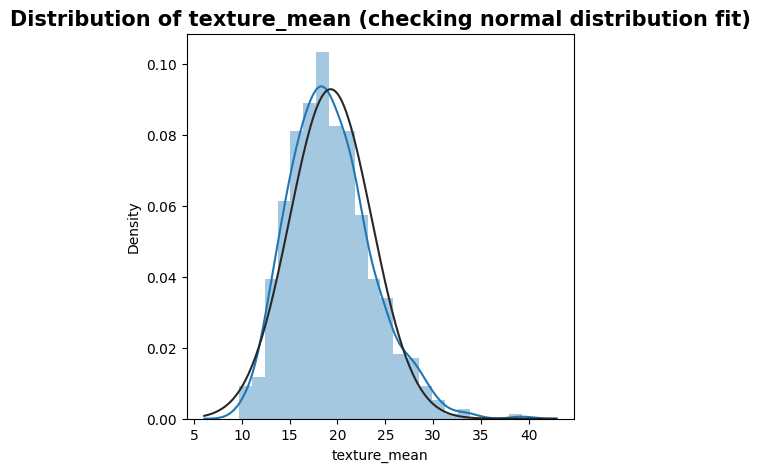

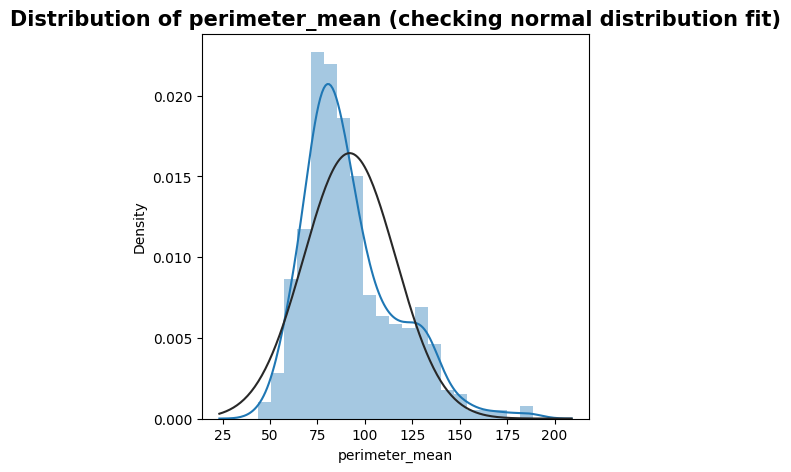

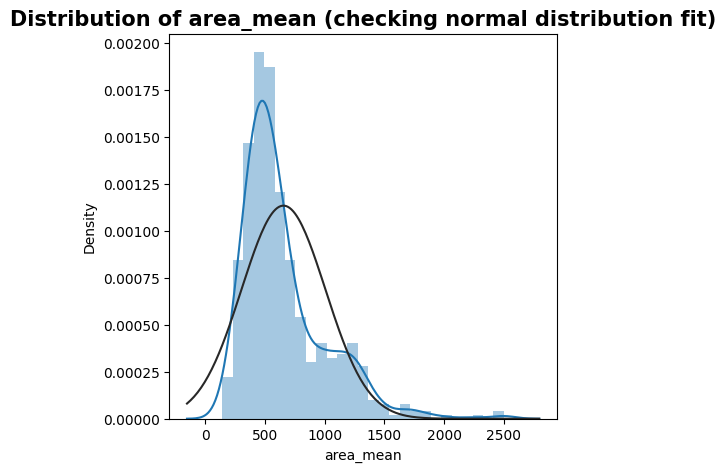

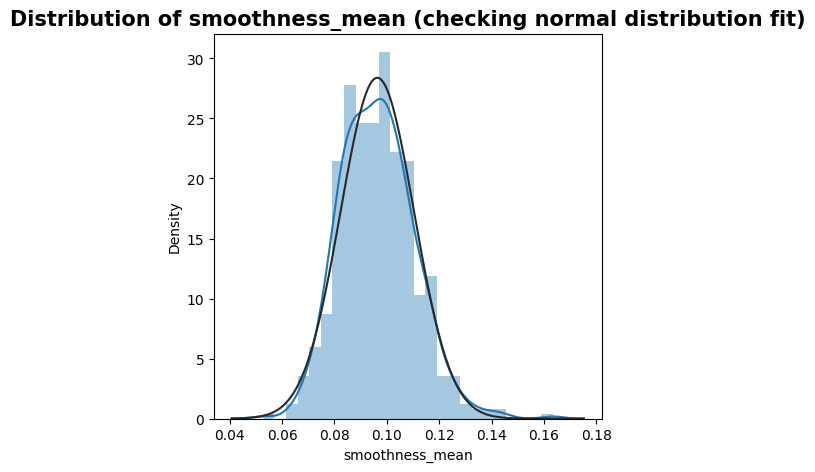

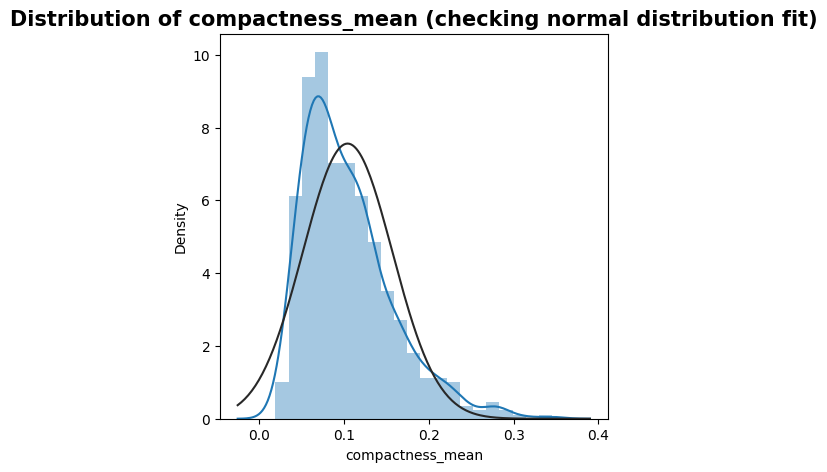

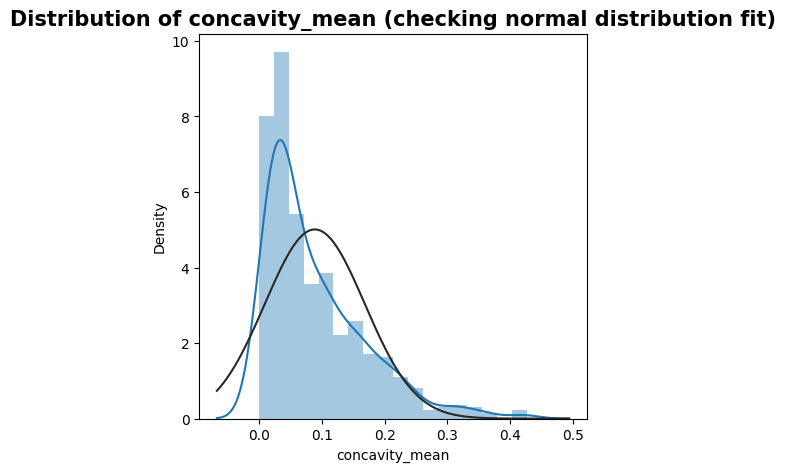

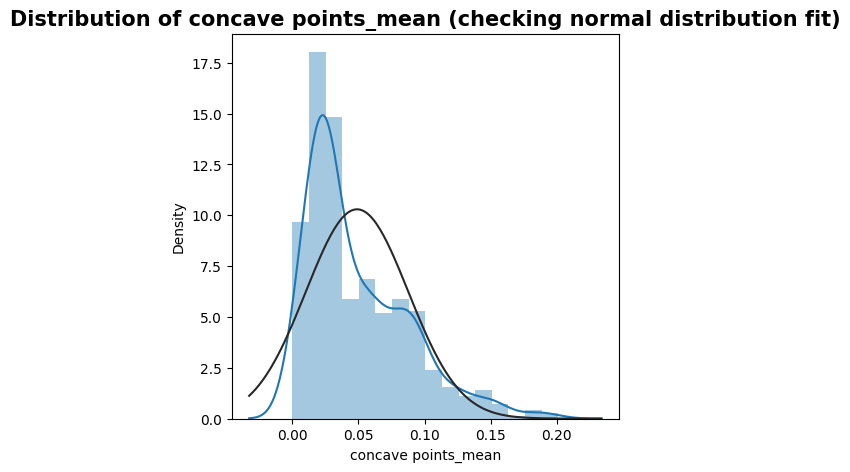

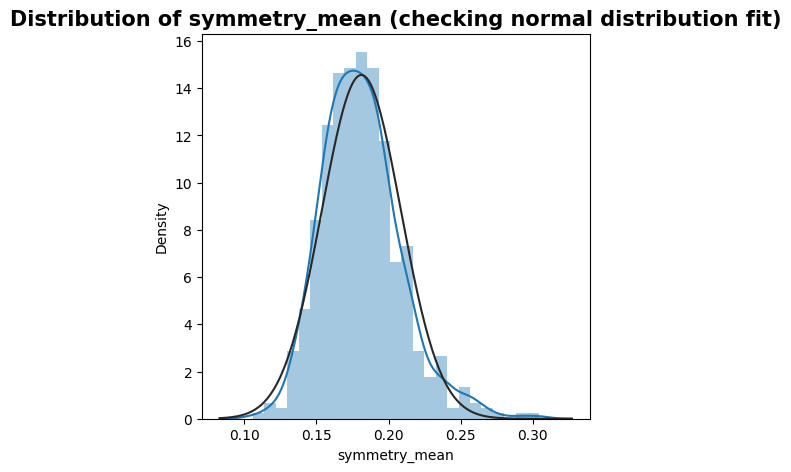

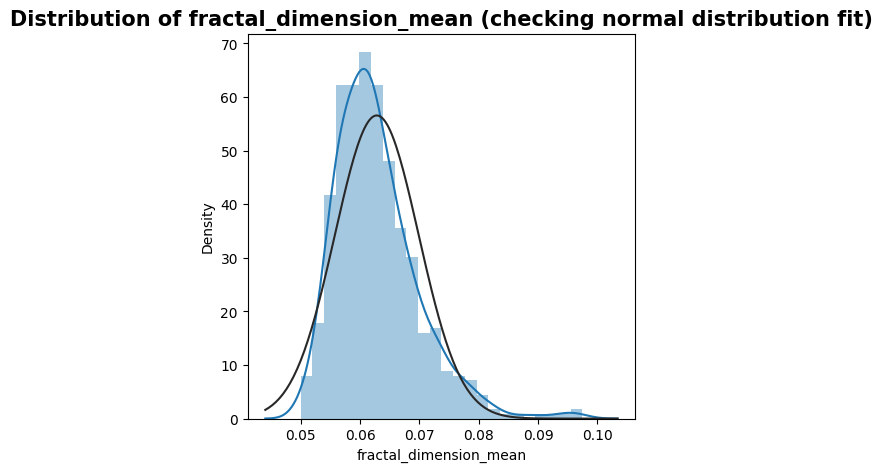

In [38]:

# Checking the distribution of independent(predictor) variables
datalist = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
            'fractal_dimension_mean']
for i in datalist:
    from scipy import stats
    plt.figure(figsize=(5,5))
    sns.distplot(data[i], fit=stats.norm)
    plt.title(f"Distribution of {i} (checking normal distribution fit)",
              size=15, weight="bold")


Observations from the graphs for the breast cancer dataset

radius_mean: normal distribution with a bit of right-skewness



texture_mean: normal distribution with a bit of right-skewness

perimeter_mean: normal distribution with a bit of right-skewness

area_mean: normal distribution with a bit of right-skewness

smoothness_mean: normal distribution

compactness_mean: normal distribution with right-skewness

concavity_mean: almost normal distribution

concave point_mean: almost normal distribution with right-skewness

symmetry_mean: normal distribution with a bit of right-skewness

fractal_dimension mean: normal distribution with a bit of right-skewness

### **What are the likely distributions of the numeric variables?**

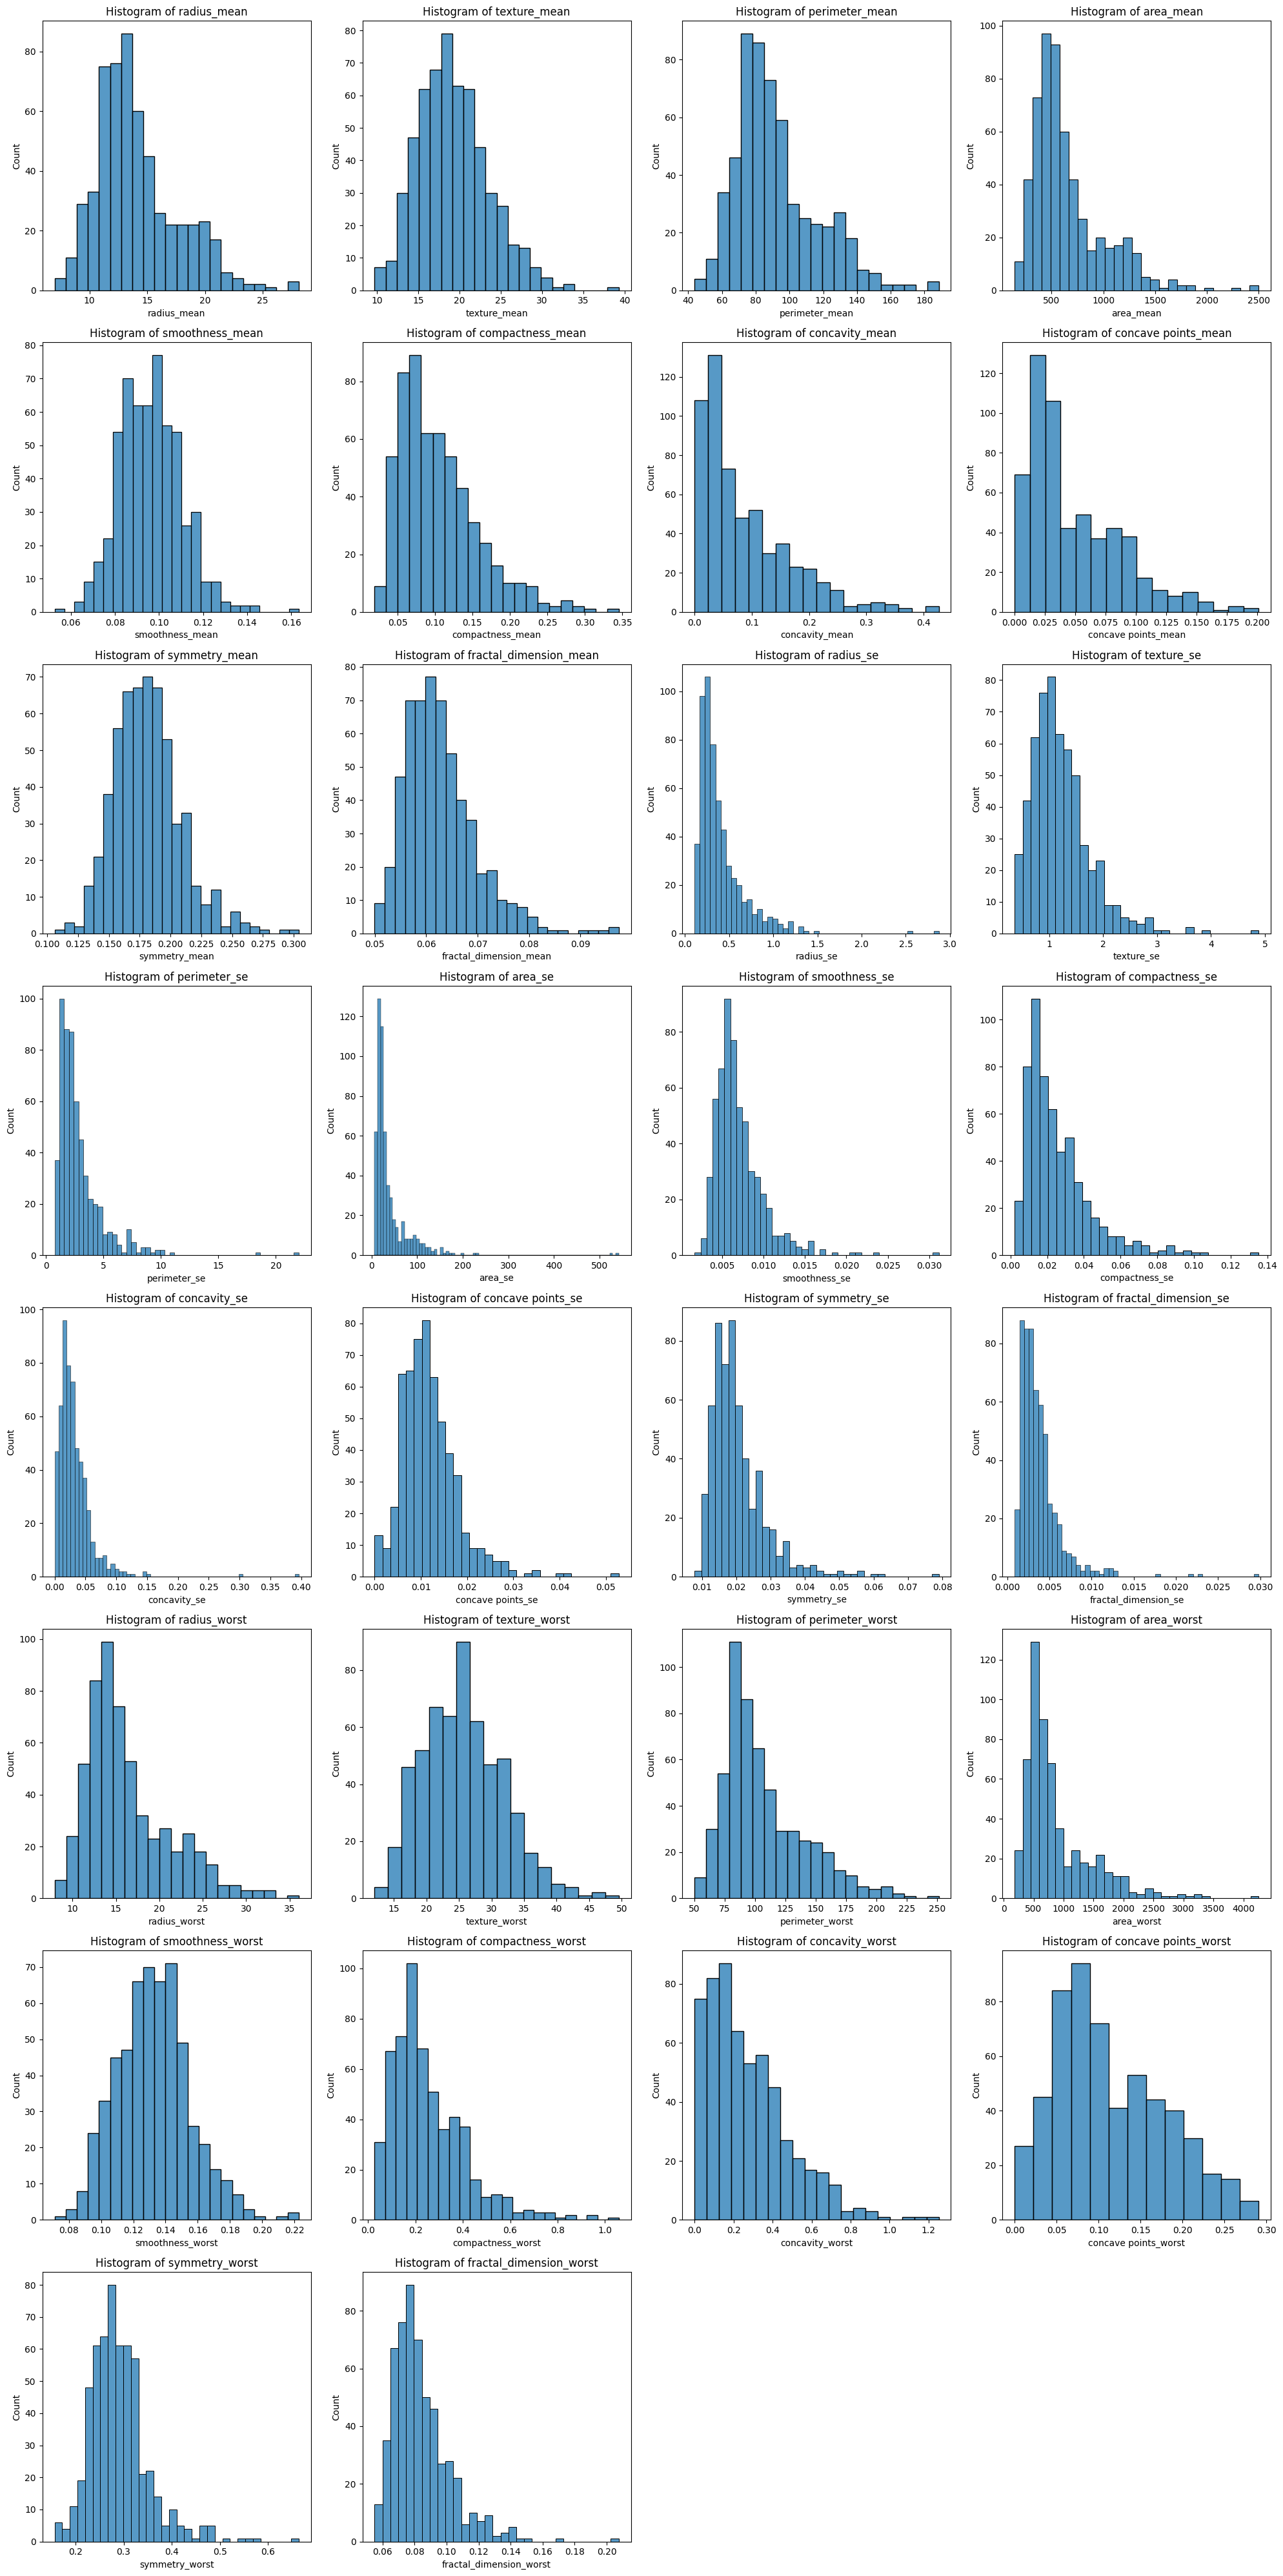

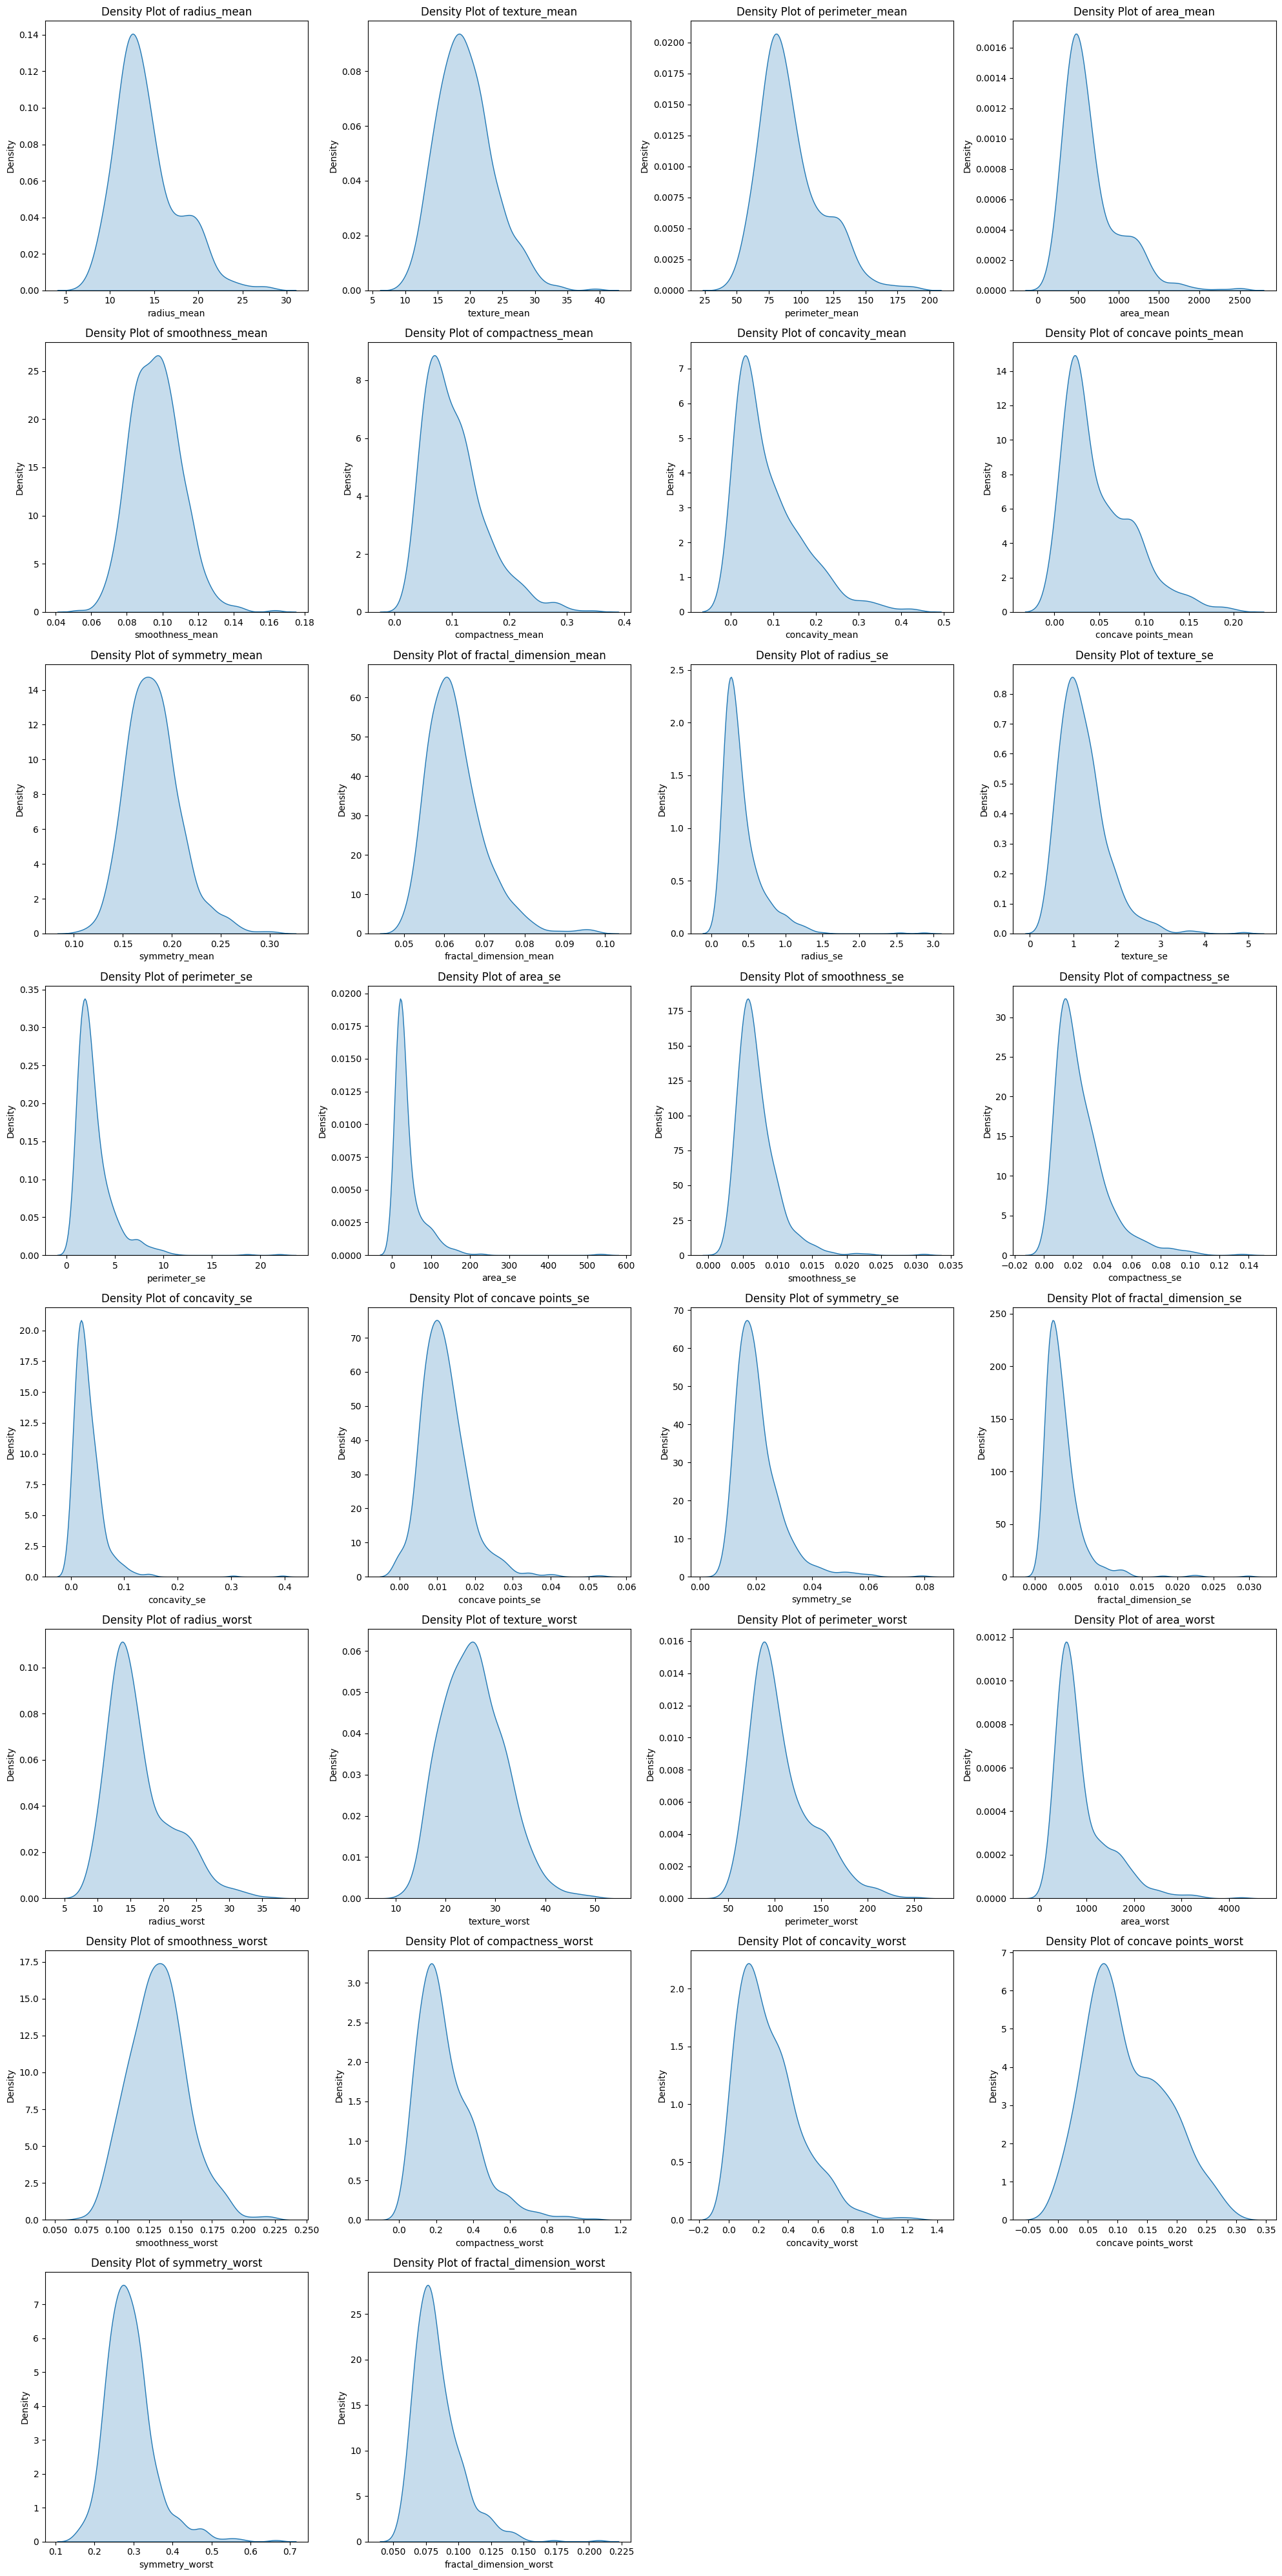

Descriptive Statistics (Including Skewness):
      radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
mean    14.127292     19.289649       91.969033  654.889104         0.096360   
std      3.524049      4.301036       24.298981  351.914129         0.014064   
skew     0.942380      0.650450        0.990650    1.645732         0.456324   
50%     13.370000     18.840000       86.240000  551.100000         0.095870   

      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
mean          0.104341        0.088799             0.048919       0.181162   
std           0.052813        0.079720             0.038803       0.027414   
skew          1.190123        1.401180             1.171180       0.725609   
50%           0.092630        0.061540             0.033500       0.179200   

      fractal_dimension_mean  ...  radius_worst  texture_worst  \
mean                0.062798  ...     16.269190      25.677223   
std                 0.007060  .

In [41]:
import seaborn as sns
from scipy.stats import shapiro

# Assuming 'data' is your DataFrame
numeric_data = data.select_dtypes(include=['float64'])

# 1. Descriptive Statistics
descriptive_stats = numeric_data.describe()
skewness = numeric_data.skew()
descriptive_stats_with_skew = descriptive_stats.append(skewness.rename('skew'))

# Selecting all numeric columns
sample_columns = numeric_data.columns[:]

# Adjusting the layout for multiple subplots
n_cols = 4  # Number of columns in subplot grid
n_rows = int(len(sample_columns) / n_cols) + (len(sample_columns) % n_cols > 0)

# 2. Histograms
plt.figure(figsize=(20, n_rows * 5))
for i, col in enumerate(sample_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(numeric_data[col], kde=False)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# 3. Normality Tests and 4. Density Plots
normality_test_results = {}
plt.figure(figsize=(20, n_rows * 5))
for i, col in enumerate(sample_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(numeric_data[col], fill=True)
    plt.title(f'Density Plot of {col}')

    # Shapiro-Wilk Test with a check for sample size
    if len(numeric_data[col]) <= 5000:
        normality_test_results[col] = shapiro(numeric_data[col])
    else:
        normality_test_results[col] = (None, None)  # or any other placeholder
plt.tight_layout()
plt.show()

# Printing Descriptive Statistics and Normality Test Results
print("Descriptive Statistics (Including Skewness):")
print(descriptive_stats_with_skew.loc[['mean', 'std', 'skew', '50%']])
print("\nShapiro-Wilk Normality Test Results:")
for col, result in normality_test_results.items():
    print(f"{col}: Statistics={result[0]}, p-value={result[1]}")

What are the likely distributions of the numeric variables?

The mean of 'radius_mean' is  14.13
The median of 'radius_mean' is  13.37
The Mode of 'radius_mean' is  0    12.34
Name: radius_mean, dtype: float64


Text(0.5, 1.0, 'Distribution curve for radius_mean')

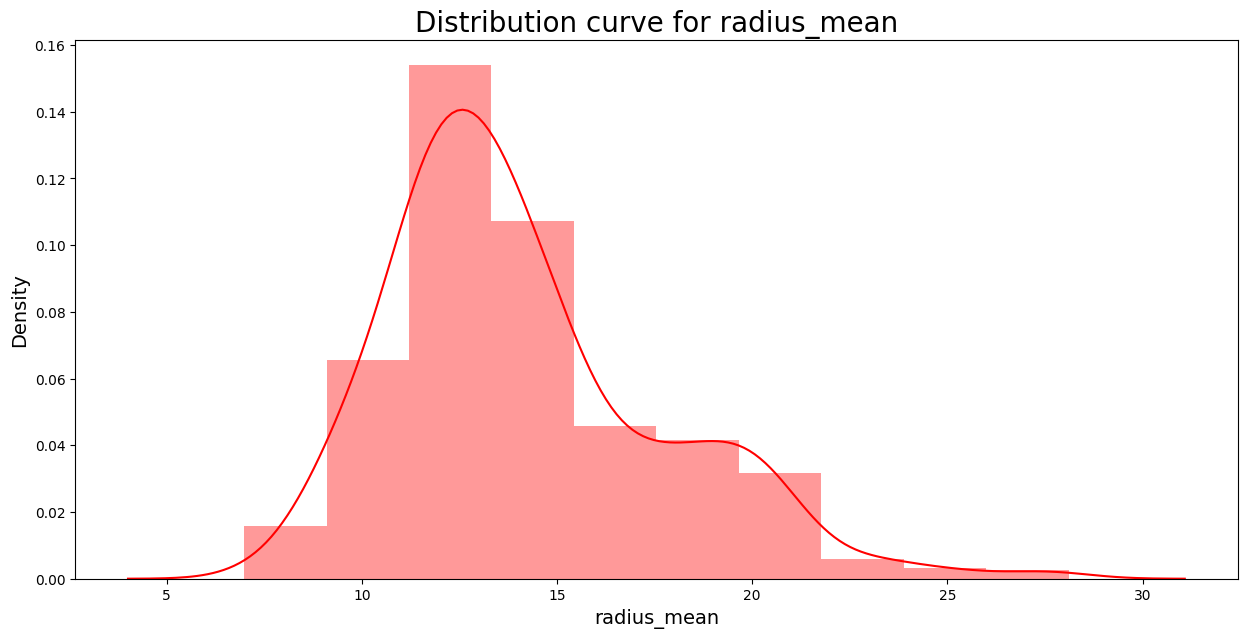

In [33]:

plt.figure(figsize=(15,7))
sns.distplot(data['radius_mean'], bins=10, color="red")
print("The mean of 'radius_mean' is ", round(data['radius_mean'].mean(), 2))
print("The median of 'radius_mean' is ", data['radius_mean'].median())
print("The Mode of 'radius_mean' is ", data['radius_mean'].mode())
plt.xlabel("radius_mean", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for radius_mean', size=20)


The mean and median values are nearly identical.

The density is highest for radium at around the value of 12.

The curve starts rising from a value of about 5 and begins to decline after reaching approximately 30.

The mean of texture_mean is 19.29
The median of texture_mean is 18.84
The Mode of texture_mean is 14.93


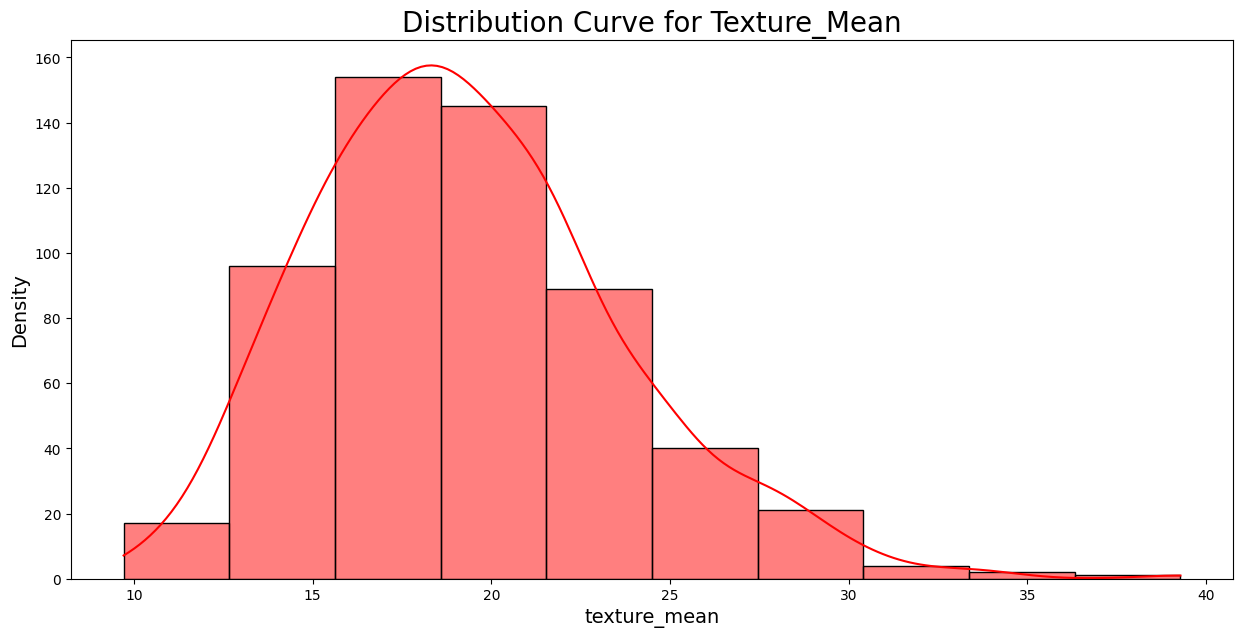

In [42]:
plt.figure(figsize=(15, 7))

# Plotting the distribution of texture_mean
sns.histplot(data['texture_mean'], bins=10, kde=True, color="red")
plt.xlabel("texture_mean", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution Curve for Texture_Mean', size=20)

# Calculating mean, median, and mode
mean_texture = round(data['texture_mean'].mean(), 2)
median_texture = data['texture_mean'].median()
mode_texture = data['texture_mean'].mode()[0]  # mode() returns a Series, getting the first element

# Printing the calculated values
print(f"The mean of texture_mean is {mean_texture}")
print(f"The median of texture_mean is {median_texture}")
print(f"The Mode of texture_mean is {mode_texture}")

plt.show()

The mean of area_mean is 654.89
The median of area_mean is 551.1
The Mode of area_mean is 512.2


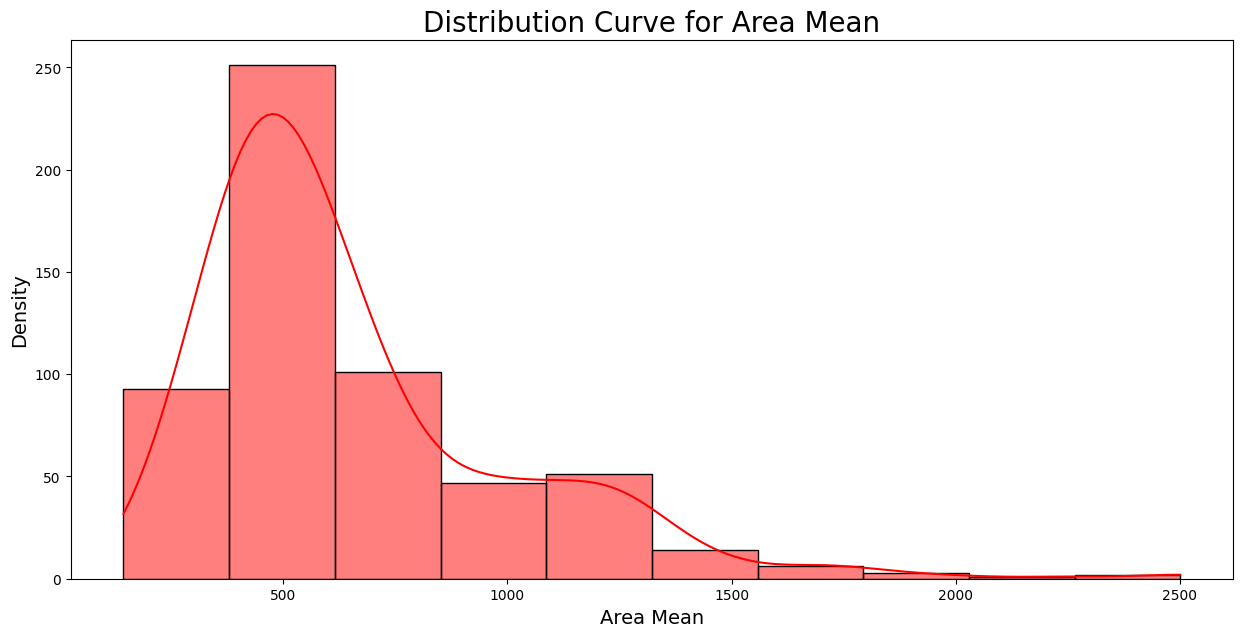

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the plot with specified dimensions
plt.figure(figsize=(15, 7))

# Creating a histogram with a kernel density estimate for area_mean
sns.histplot(data['area_mean'], bins=10, kde=True, color="red")
plt.xlabel("Area Mean", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution Curve for Area Mean', size=20)

# Calculating and displaying statistical measures for area_mean
average_area = round(data['area_mean'].mean(), 2)
median_area = data['area_mean'].median()
mode_area = data['area_mean'].mode()[0]  # Extracting the first mode value

# Outputting the statistical measures
print(f"The mean of area_mean is {average_area}")
print(f"The median of area_mean is {median_area}")
print(f"The Mode of area_mean is {mode_area}")

plt.show()


The mean of 'perimeter_mean' is 91.97
The median of 'perimeter_mean' is 86.24
The Mode of 'perimeter_mean' is 82.61


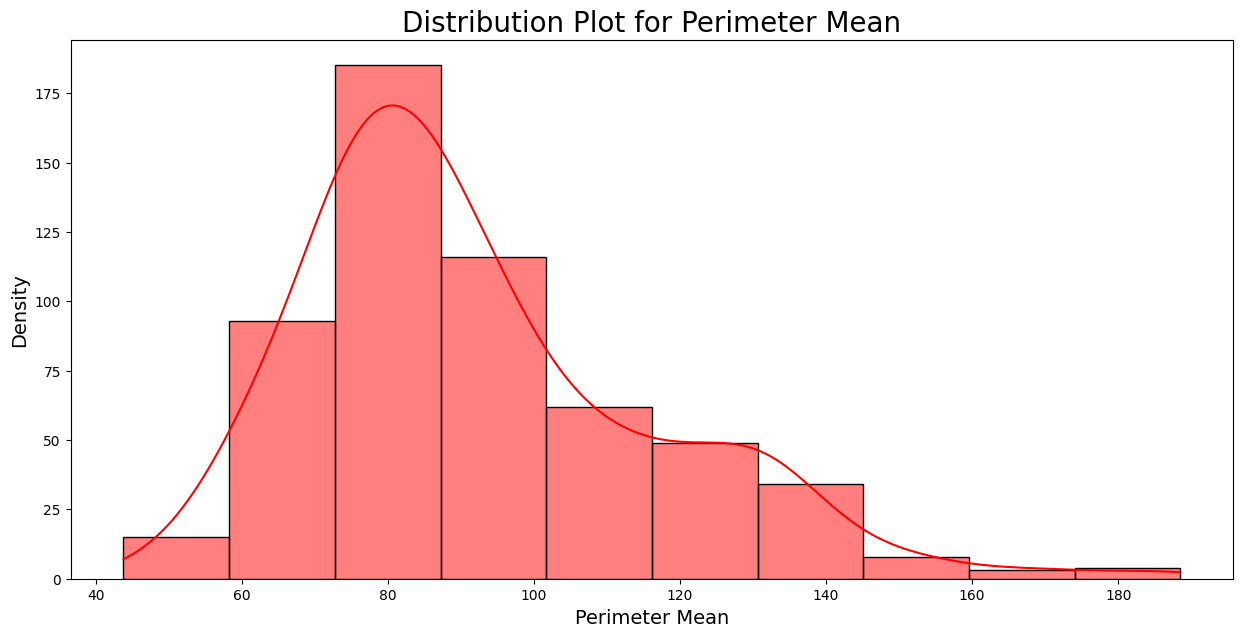

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the size for the plot
plt.figure(figsize=(15, 7))

# Plotting the distribution of perimeter_mean with red color
sns.histplot(data['perimeter_mean'], bins=10, kde=True, color="red")
plt.xlabel("Perimeter Mean", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution Plot for Perimeter Mean', size=20)

# Computing mean, median, and mode for perimeter_mean
mean_val = round(data['perimeter_mean'].mean(), 2)
median_val = data['perimeter_mean'].median()
mode_val = data['perimeter_mean'].mode()[0]

# Printing the calculated statistics
print(f"The mean of 'perimeter_mean' is {mean_val}")
print(f"The median of 'perimeter_mean' is {median_val}")
print(f"The Mode of 'perimeter_mean' is {mode_val}")

plt.show()


In [45]:
def binary_diagnosis(value):
    return 1 if value == "Yes" else 0

data['binary_diagnosis'] = data['diagnosis'].apply(binary_diagnosis)


### **Do the range of the predictor variables make sense?**

                 id  radius_mean  texture_mean  perimeter_mean   area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000  569.000000   
mean   3.037183e+07     0.338222      0.323965        0.332935    0.216920   
std    1.250206e+08     0.166787      0.145453        0.167915    0.149274   
min    8.670000e+03     0.000000      0.000000        0.000000    0.000000   
25%    8.692180e+05     0.223342      0.218465        0.216847    0.117413   
50%    9.060240e+05     0.302381      0.308759        0.293345    0.172895   
75%    8.813129e+06     0.416442      0.408860        0.416765    0.271135   
max    9.113205e+08     1.000000      1.000000        1.000000    1.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.394785          0.260601        0.208058             0.243137   
std           0.126967          0.161992        0.1867

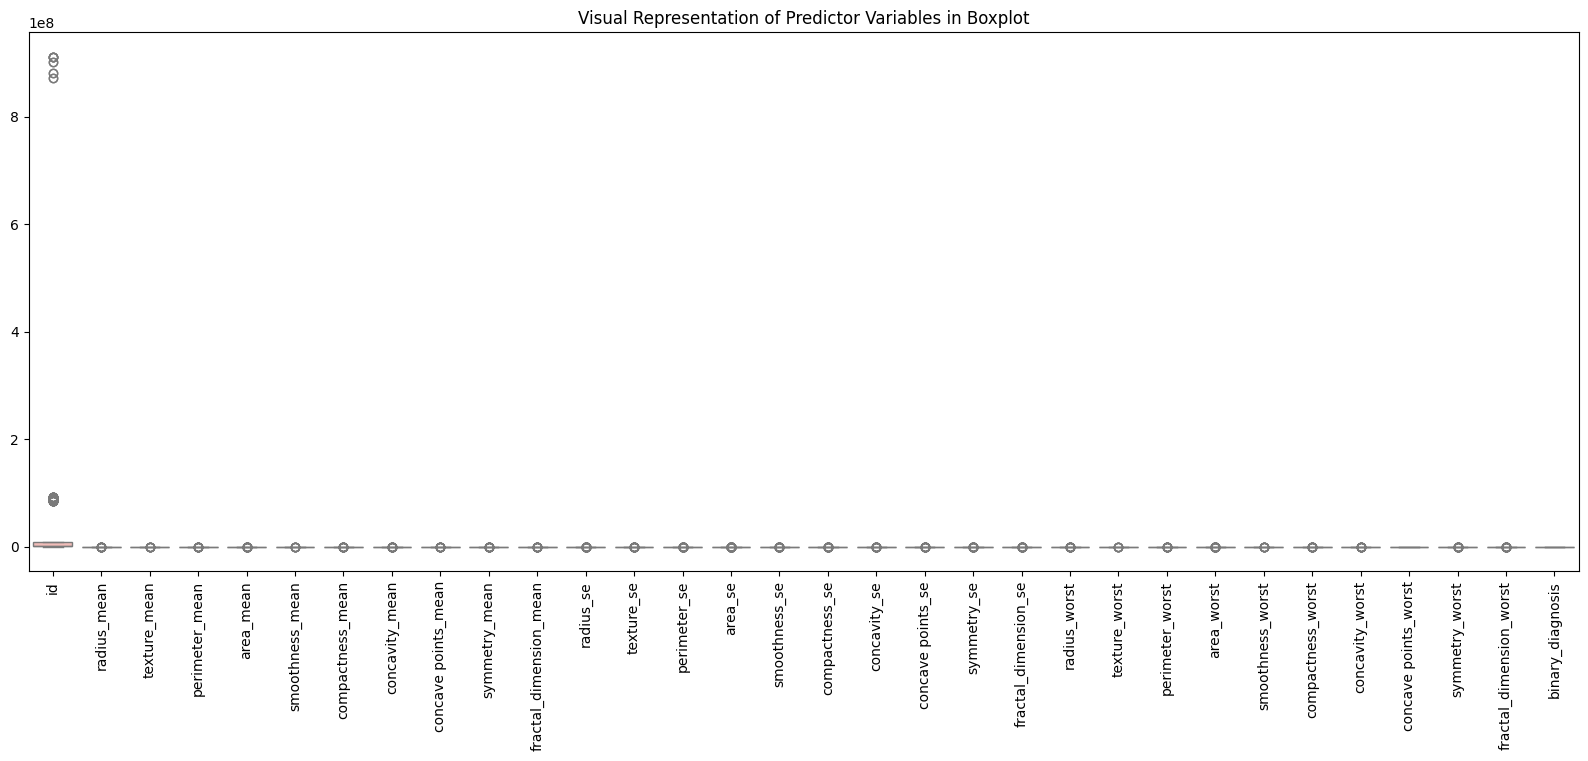

In [58]:
# Displaying descriptive statistics for the numerical columns in the data
numerical_summary = data.describe()
print(numerical_summary)

# Creating a boxplot for a visual overview of the data
plt.figure(figsize=(20, 7))
sns.boxplot(data=datafinal, palette="Pastel1")  # Using a different color palette for variation
plt.title('Visual Representation of Predictor Variables in Boxplot')
plt.xticks(rotation=90)  # Keeping the x-axis labels rotated for clarity
plt.show()



Radius Mean (radius_mean):


The 'radius_mean' column ranges from approximately 6.981 to 28.11. The distribution of values suggests a wide range of cell nucleus sizes, with some smaller and others larger.

Texture Mean (texture_mean):
The 'texture_mean' column ranges from approximately 9.71 to 39.28.

Perimeter Mean (perimeter_mean):
The 'perimeter_mean' column ranges from approximately 43.79 to 188.5. The wide range of perimeters suggests differences in the overall shape and size of cell nuclei.

Area Mean (area_mean):
The 'area_mean' column ranges from approximately 143.5 to 2501. The substantial variation in area values indicates differences in the size of cell nuclei, with some being significantly larger than others.

Smoothness Mean (smoothness_mean):
The 'smoothness_mean' column shows values ranging within a smaller range. The relatively lower standard deviation suggests that the smoothness values are less dispersed and relatively consistent among observations.

Compactness Mean (compactness_mean):
The 'compactness_mean' column has a wider range of values. The distribution of values suggests variations in how tightly packed cell nuclei are, with some being more compact and others less so.

Concavity Mean (concavity_mean):
The 'concavity_mean' column ranges from 0 to higher values. The presence of values close to zero indicates that some cell nuclei exhibit little to no concavity, while others have more concave shapes.

Concave Points Mean (concave points_mean):
The 'concave points_mean' column ranges from 0 to higher values. The variation in values suggests differences in the number of concave points among cell nuclei.

Symmetry Mean (symmetry_mean):
The 'symmetry_mean' column shows values ranging within a smaller range. The relatively lower standard deviation suggests that symmetry values are less dispersed and relatively consistent among observations.

Fractal Dimension Mean (fractal_dimension_mean):
The 'fractal_dimension_mean' column ranges within a smaller range. The values suggest a relatively consistent fractal dimension.

Diagnosis Binary (diagnosis_binary):
The 'diagnosis_binary' column appears to contain constant values with a standard deviation of 0. This shows that'diagnosis_binary' column may not provide much variability and might not be suitable as a predictor variable.

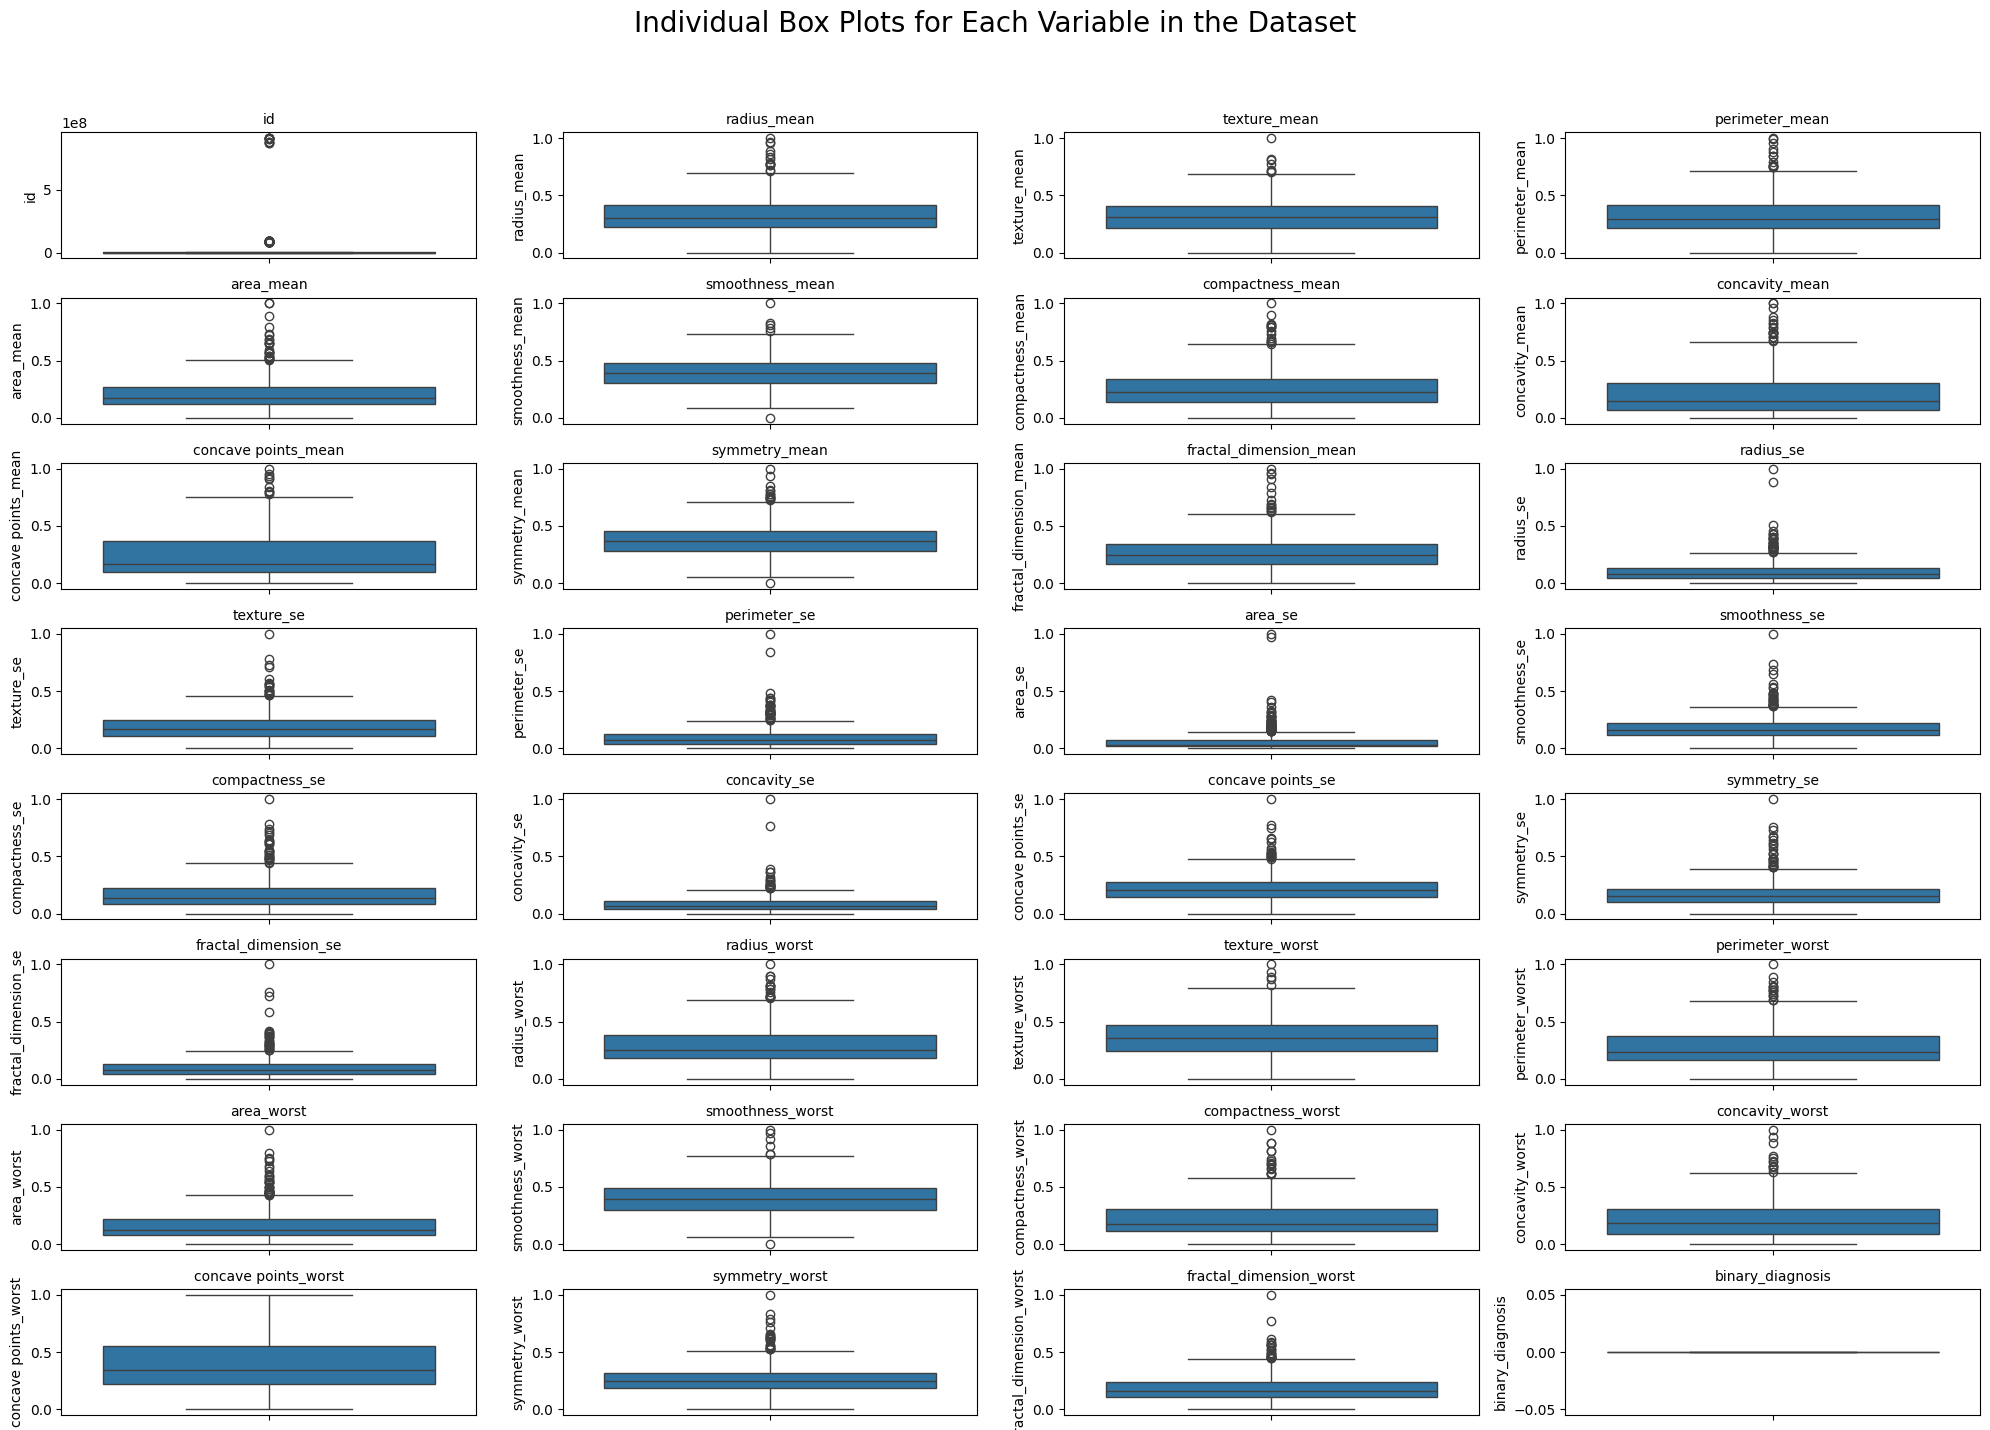

In [59]:
import matplotlib.pyplot as plt

# Setting up a grid for individual box plots for each numerical variable
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 15))
fig.suptitle('Individual Box Plots for Each Variable in the Dataset', fontsize=20)

# Iterating over the axes and plotting box plots for each column
for index, axis in enumerate(axes.ravel()):
    if index < len(datafinal.columns):
        sns.boxplot(y=datafinal[datafinal.columns[index]], ax=axis)
        axis.set_title(datafinal.columns[index], fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting layout to fit the main title
plt.show()


The breast cancer dataset contains numerical variables with varying ranges, making it difficult to visualize and analyze effectively.

To address this issue and prepare the data for modeling, normalization is chosen as the scaling technique.

In [60]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'data' is your DataFrame containing the breast cancer dataset
columns_for_normalization = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
    'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

# Extracting the values from the specified columns as floating-point numbers
values_to_scale = data[columns_for_normalization].values.astype(float)

# Setting up the Min-Max scaler
scaler = MinMaxScaler()

# Applying the Min-Max scaling transformation
scaled_values = scaler.fit_transform(values_to_scale)

# Updating the DataFrame with the normalized data
data[columns_for_normalization] = pd.DataFrame(scaled_values, columns=columns_for_normalization)


In [61]:

#data after noromalizing and feature creation
data.describe()


id  radius_mean  texture_mean  perimeter_mean   area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000  569.000000   
mean   3.037183e+07     0.338222      0.323965        0.332935    0.216920   
std    1.250206e+08     0.166787      0.145453        0.167915    0.149274   
min    8.670000e+03     0.000000      0.000000        0.000000    0.000000   
25%    8.692180e+05     0.223342      0.218465        0.216847    0.117413   
50%    9.060240e+05     0.302381      0.308759        0.293345    0.172895   
75%    8.813129e+06     0.416442      0.408860        0.416765    0.271135   
max    9.113205e+08     1.000000      1.000000        1.000000    1.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.394785          0.260601        0.208058             0.243137   
std           0.126967          0.161992        0.186785             0.192857   
min           0.000000          0.000000        0.000000             0.000000   
25%           0.304595          0.139685        0.069260             0.100944   
50%           0.390358          0.224679        0.144189             0.166501   
75%           0.475490          0.340531        0.306232             0.367793   
max           1.000000          1.000000        1.000000             1.000000   

       symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
count     569.000000  ...     569.000000       569.000000  569.000000   
mean        0.379605  ...       0.363998         0.283138    0.170906   
std         0.138456  ...       0.163813         0.167352    0.139932   
min         0.000000  ...       0.000000         0.000000    0.000000   
25%         0.282323  ...       0.241471         0.167837    0.081130   
50%         0.369697  ...       0.356876         0.235320    0.123206   
75%         0.453030  ...       0.471748         0.373475    0.220901   
max         1.000000  ...       1.000000         1.000000    1.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.404138           0.220212         0.217403   
std            0.150779           0.152649         0.166633   
min            0.000000           0.000000         0.000000   
25%            0.300007           0.116337         0.091454   
50%            0.397081           0.179110         0.181070   
75%            0.494156           0.302520         0.305831   
max            1.000000           1.000000         1.000000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.393836        0.263307                 0.189596   
std                0.225884        0.121954                 0.118466   
min                0.000000        0.000000                 0.000000   
25%                0.223127        0.185098                 0.107700   
50%                0.343402        0.247782                 0.163977   
75%                0.554639        0.318155                 0.242949   
max                1.000000        1.000000                 1.000000   

       binary_diagnosis  
count             569.0  
mean                0.0  
std                 0.0  
min                 0.0  
25%                 0.0  
50%                 0.0  
75%                 0.0  
max                 0.0  

[8 rows x 32 columns]

Observations: It's apparent that the numerical variables in the dataset, which include 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', and 'fractal_dimension_worst', have been successfully normalized to a scale ranging from 0 to 1.

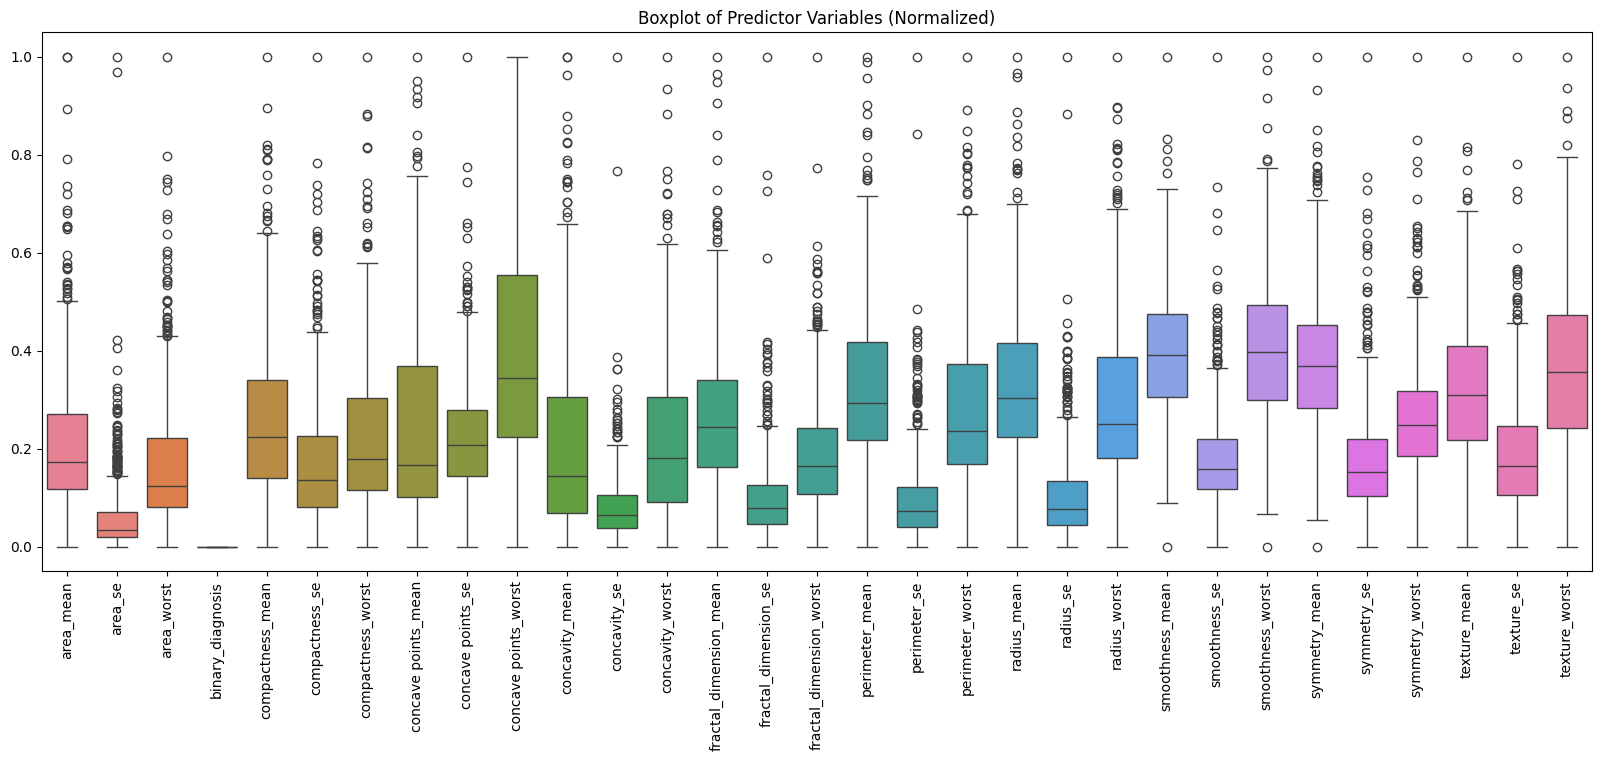

In [67]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and set its size
plt.figure(figsize=(20, 7))

# Assuming 'datafinal' is your breast cancer dataset
# Exclude the 'id' column (if you don't want to plot it)
columns_to_plot = datafinal.columns.difference(['id'])

# Create a boxplot for the remaining columns
sns.boxplot(data=datafinal[columns_to_plot])

# Set the plot title
plt.title("Boxplot of Predictor Variables (Normalized)")

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()


It shows a clear visualization


### **Are the predictor variables independent of all other predictor variables?**

In [68]:
#Evaluating the relationship between each pair of features in the dataset
datafinal.corr()

id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.679090      0.275869        0.691765   
texture_se              -0.007526    -0.097317      0.386358       -0.086761   
perimeter_se             0.137331     0.674172      0.281673        0.693135   
area_se                  0.177742     0.735864      0.259845        0.744983   
smoothness_se            0.096781    -0.222600      0.006614       -0.202694   
compactness_se           0.033961     0.206000      0.191975        0.250744   
concavity_se             0.055239     0.194204      0.143293        0.228082   
concave points_se        0.078768     0.376169      0.163851        0.407217   
symmetry_se             -0.017306    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.025725    -0.042641      0.054458       -0.005523   
radius_worst             0.082405     0.969539      0.352573        0.969476   
texture_worst            0.064720     0.297008      0.912045        0.303038   
perimeter_worst          0.079986     0.965137      0.358040        0.970387   
area_worst               0.107187     0.941082      0.343546        0.941550   
smoothness_worst         0.010338     0.119616      0.077503        0.150549   
compactness_worst       -0.002968     0.413463      0.277830        0.455774   
concavity_worst          0.023203     0.526911      0.301025        0.563879   
concave points_worst     0.035174     0.744214      0.295316        0.771241   
symmetry_worst          -0.044224     0.163953      0.105008        0.189115   
fractal_dimension_worst -0.029866     0.007066      0.119205        0.051019   
binary_diagnosis              NaN          NaN           NaN             NaN   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.096893        -0.012968          0.000096   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
con

Conclusion
Upon initial observation, it's evident that the variables exhibit minimal collinearity.

Next, let's proceed to create a heatmap for a more detailed visual representation of these correlation values.


<Axes: >

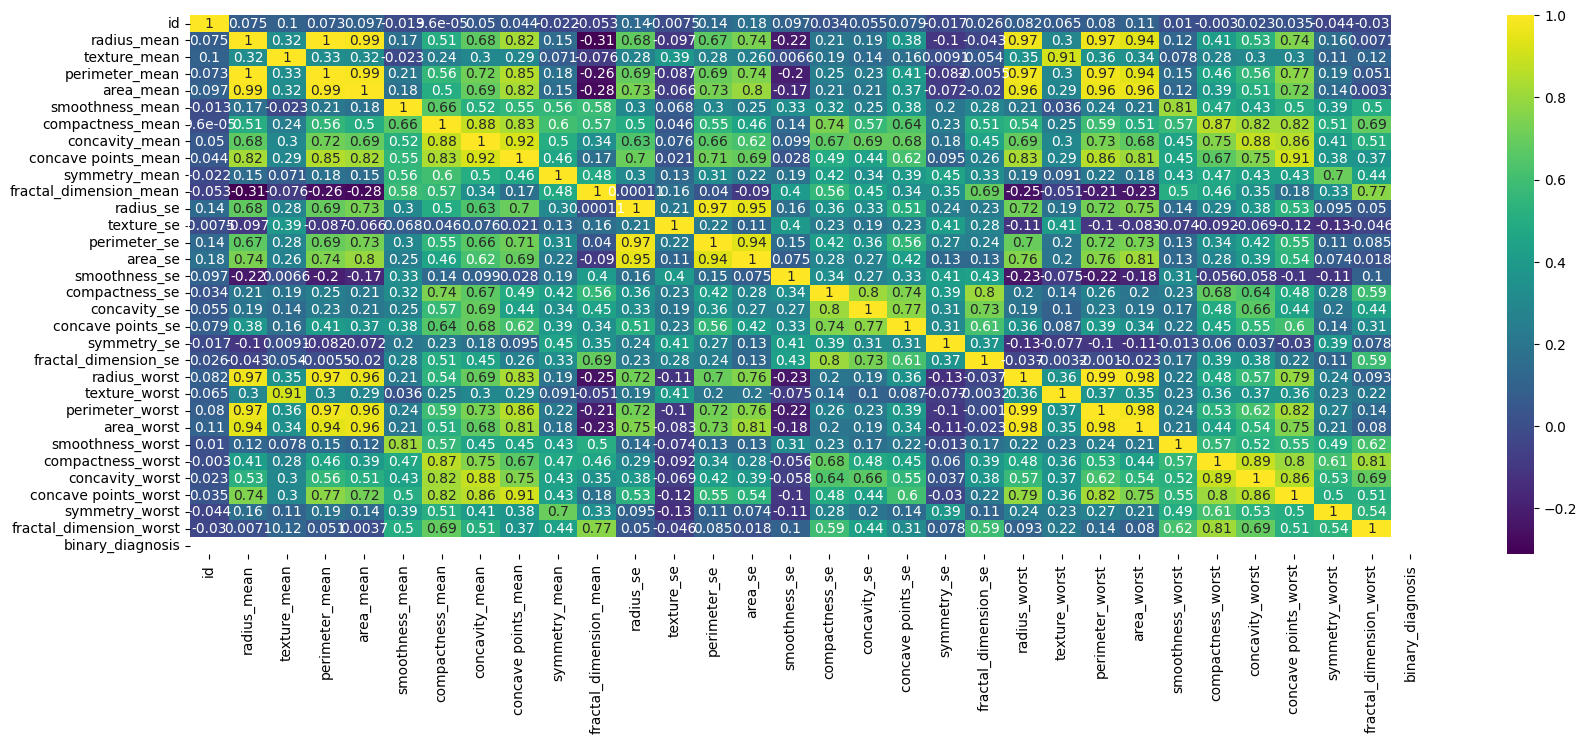

In [71]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(datafinal.corr(), annot=True, cmap='viridis')


### **Observations:**

The visualizations indicate that there is generally low correlation among most of the features.
The correlation value between 'Perimeter_se' and 'Radius_se' is notably high at 0.97.
Similarly, 'Radius_mean' and 'Perimeter_mean' also exhibit a high correlation, with a value of 0.97.







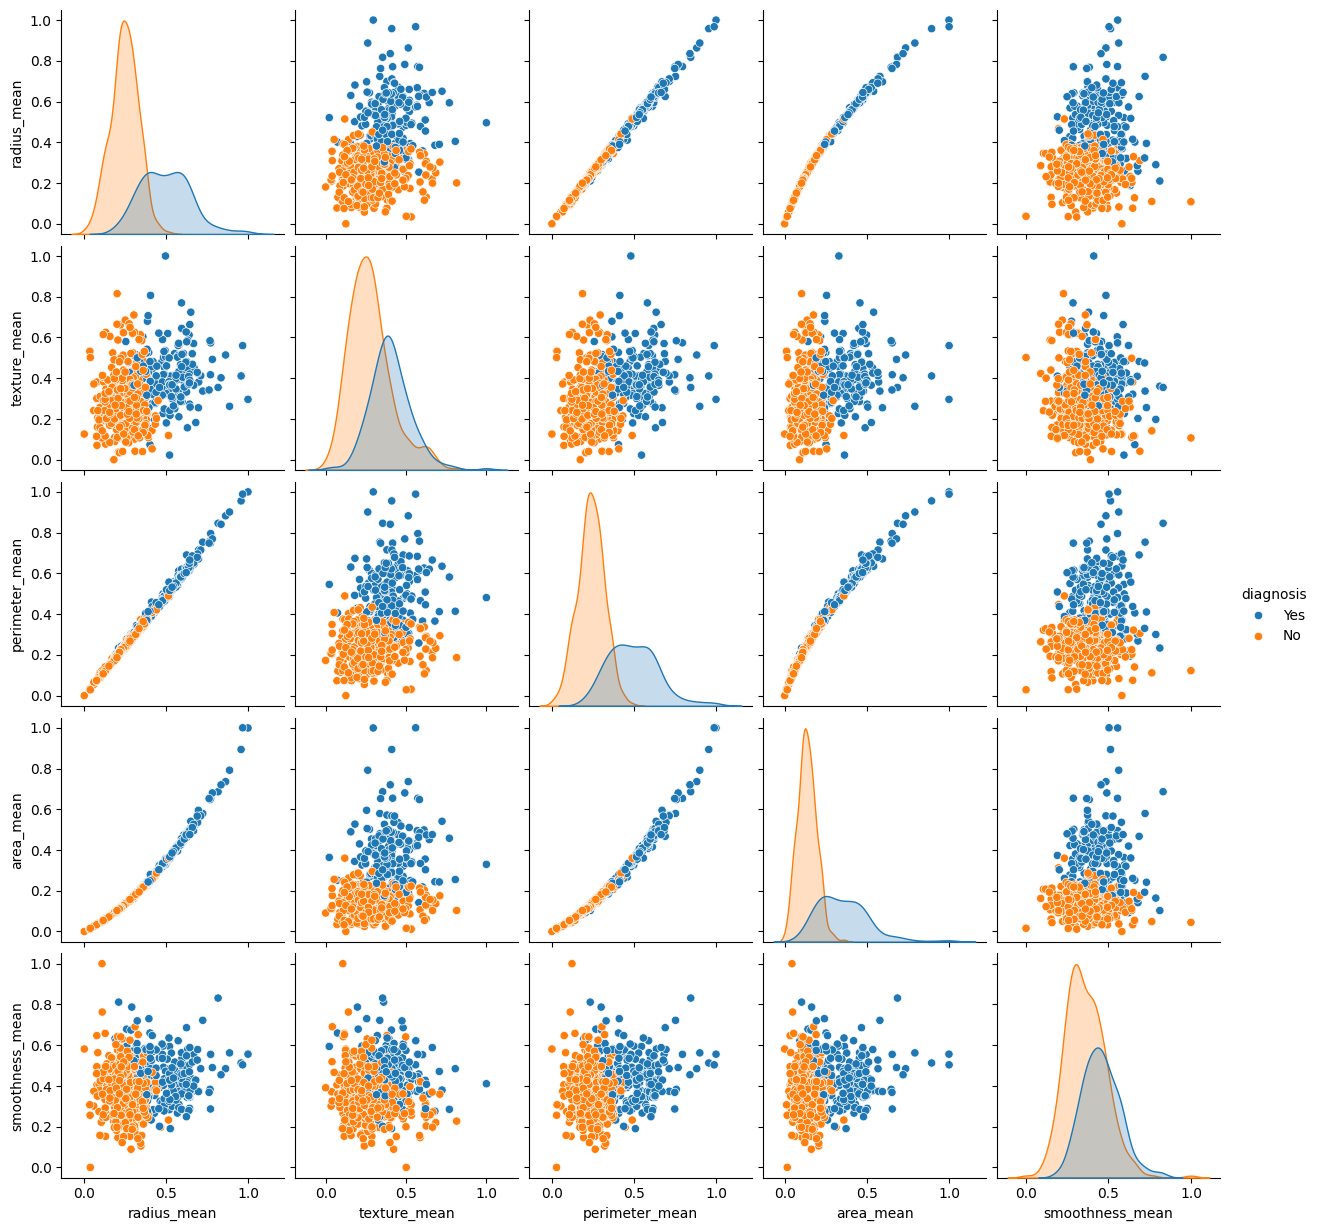

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generating a pair plot for selected variables to analyze collinearity
chosen_columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(data[chosen_columns], hue='diagnosis')
plt.show()


### **Which independent variables are useful to predict a target (dependent variable)?**

### **Method 1: Using OLS for finding the p value to check the significant features**

In [75]:

import statsmodels.api as sm

# Assuming 'data' is your DataFrame
# Replace 'data' with the actual name of your DataFrame if it's different

# Mapping the 'diagnosis' values from 'Yes' and 'No' to 1.0 and 0.0
diagnosis_mapping = {'Yes': 1.0, 'No': 0.0}
data['diagnosis'] = data['diagnosis'].map(diagnosis_mapping)

# Add a constant (intercept) to the dataset
data['intercept'] = 1

# Define the list of independent variables
independent_vars = ['intercept', 'radius_mean', 'texture_mean', 'perimeter_mean',
                    'area_mean', 'smoothness_mean', 'compactness_mean',
                    'concavity_mean', 'concave points_mean', 'symmetry_mean',
                    'fractal_dimension_mean']

# Build and fit the OLS regression model
model = sm.OLS(data['diagnosis'], data[independent_vars]).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     120.1
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          4.40e-132
Time:                        06:25:36   Log-Likelihood:                -67.236
No. Observations:                 569   AIC:                             156.5
Df Residuals:                     558   BIC:                             204.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -0

 The analysis of the OLS regression model has led to several observations regarding the significance of various predictor variables in determining the diagnosis. The model uses a significance threshold of 0.05 for p-values to determine the relevance of each feature.
### **Observation**

radius_mean: This feature is highly significant in predicting the diagnosis, as indicated by its p-value of 0.000, which is well below the 0.05 threshold.

texture_mean: Also a significant predictor, texture_mean's p-value of 0.000 suggests its strong relevance in the model.

perimeter_mean: With a p-value of 0.009, perimeter_mean is considered statistically significant, falling under the 0.05 cutoff.

area_mean: This variable is statistically significant in the model, evidenced by its p-value of 0.000.

smoothness_mean: Its p-value of 0.169 exceeds the significance threshold, indicating that it is not a significant predictor for the diagnosis.

compactness_mean: Given its p-value of 0.925, compactness_mean is deemed not significant in this context.

concavity_mean: With a p-value of 0.103, this feature is not considered a significant predictor as it's above the 0.05 threshold.

concave points_mean: This is a significantly influential feature, as shown by its p-value of 0.000.

symmetry_mean: Although close to the significance cutoff with a p-value of 0.072, it is still considered not significant.

fractal_dimension_mean: With a p-value of 0.977, it is not a significant predictor in the model.

In summary, the features radius_mean, texture_mean, perimeter_mean, area_mean, and concave points_mean are the most significant predictors for the diagnosis according to this model. The remaining features either have a marginal impact or are not significant in determining the diagnosis.

### **Method 2 :Calculating Z Score**

In [76]:
import pandas as pd

def calculate_z_scores(df):
    # Calculate Z-scores for the DataFrame
    return (df - df.mean()) / df.std()

# Assuming 'data' is your DataFrame containing the Breast Cancer dataset
# Replace 'data' with the actual name of your DataFrame if it's different

# Define the columns you want to select for Z-score calculation
columns_to_select = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Create a new DataFrame 'df' by selecting the defined columns and converting them to numeric
# Non-numeric values will be converted to NaN
df = data[columns_to_select].apply(pd.to_numeric, errors='coerce')

# Calculate Z-scores for the selected columns
z_scores = calculate_z_scores(df)

# Print the Z-scores
print(z_scores)


     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.096100     -2.071512        1.268817   0.983510         1.567087   
1       1.828212     -0.353322        1.684473   1.907030        -0.826235   
2       1.578499      0.455786        1.565126   1.557513         0.941382   
3      -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4       1.748758     -1.150804        1.775011   1.824624         0.280125   
..           ...           ...             ...        ...              ...   
564     2.109139      0.720838        2.058974   2.341795         1.040926   
565     1.703356      2.083301        1.614511   1.722326         0.102368   
566     0.701667      2.043775        0.672084   0.577445        -0.839745   
567     1.836725      2.334403        1.980781   1.733693         1.524426   
568    -1.806811      1.220718       -1.812793  -1.346604        -3.109349   

     compactness_mean  concavity_mean  concave points_mean  sym

The provided data represents the Z-scores of selected features from a breast cancer dataset. These Z-scores are calculated for each feature across 569 observations (rows). The features include 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', and 'fractal_dimension_mean'. Here are the observations based on this data:

Standardized Scale: Each feature's Z-score is standardized around a mean of 0 and a standard deviation of 1. This standardization facilitates direct comparison across different features, which might originally have different scales and units.

Variability in Features:

Positive Z-scores (greater than 0) indicate values above the mean. For example, a 'radius_mean' of 1.096100 for the first observation is above the average 'radius_mean' for this dataset.
Negative Z-scores (less than 0) indicate values below the mean. For instance, the first observation's 'texture_mean' of -2.071512 is significantly below the average for that feature.
Outliers and Extreme Values:

Extremely high or low Z-scores (e.g., greater than 3 or less than -3) suggest potential outliers. For instance, the 'smoothness_mean' of the fourth observation is 3.280667, which is quite high, potentially indicating an outlier in that feature.
Such outliers might have significant implications in analyses like clustering or anomaly detection.
Comparative Analysis:

Features with higher variability (larger range of Z-scores) might have a more significant impact in models where feature variability is crucial, such as in certain clustering algorithms or principal component analysis.
Features with lower variability might indicate less diversity in those measurements across the dataset.
Overall Distribution:

The dataset appears to have a mix of features with both high and low variability.
Some features like 'fractal_dimension_mean' show less extreme Z-scores across observations, whereas others like 'smoothness_mean' and 'compactness_mean' exhibit more extreme values.
This standardized data is useful for many statistical analyses and machine learning applications, as it normalizes the scale across different features, allowing for unbiased comparisons and computations


For other columns, while some values are close to 3 or slightly over, they may be considered borderline outliers.

Many of the z-scores are close to zero, suggesting that many data points are close to the mean.

### **Do the training and test sets have the same data?**

### **Building the Model**

Train ,Validation and Test split

In [77]:
from sklearn.model_selection import train_test_split

# Selecting the independent variables
X = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

# Dependent variable (target) is 'diagnosis'
y = data['diagnosis']

# Splitting data into Training 76.5%, Validation set 13.5%, and Test set 10%
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)



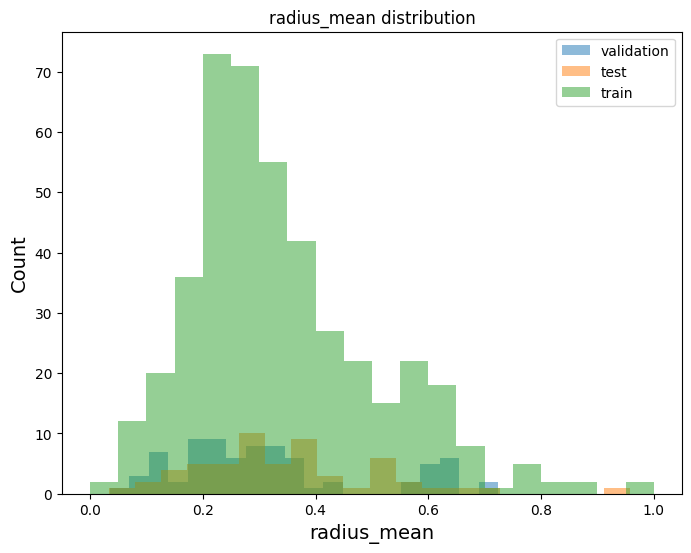

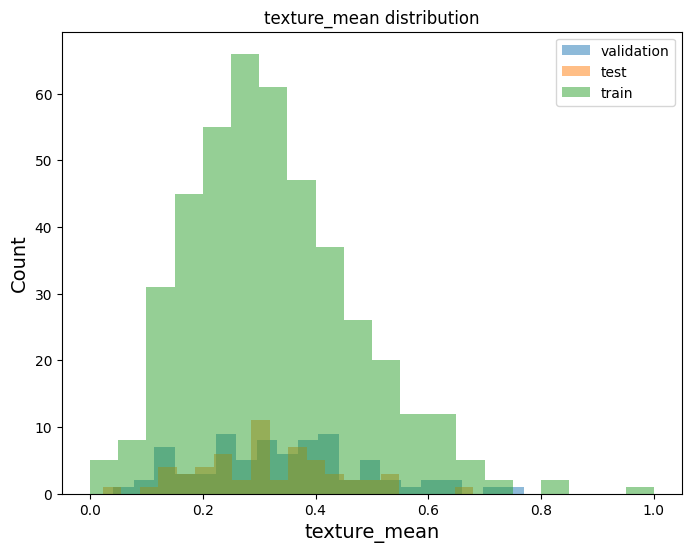

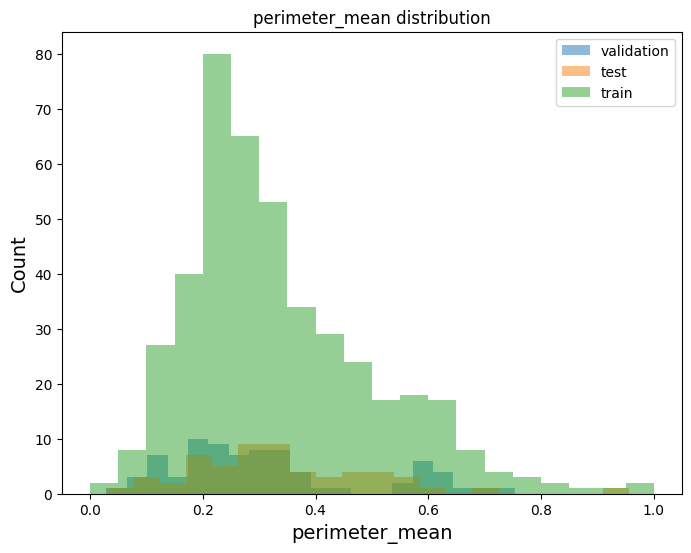

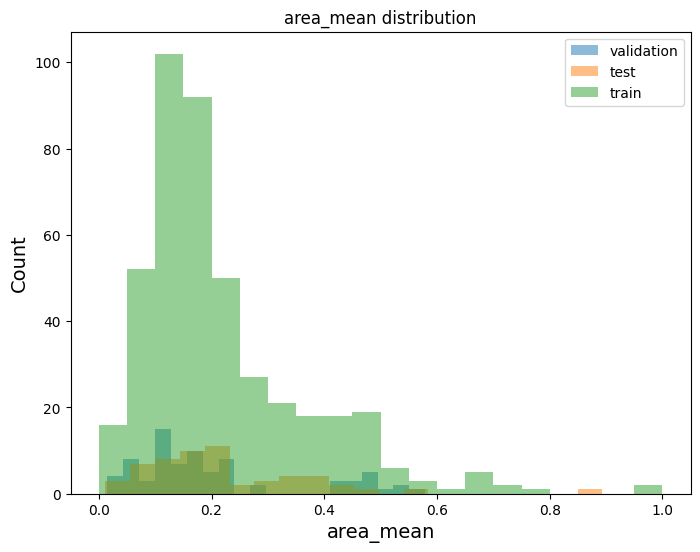

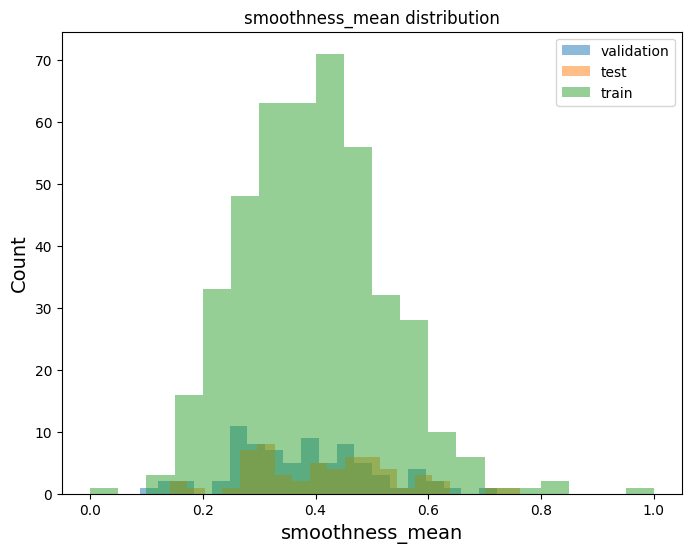

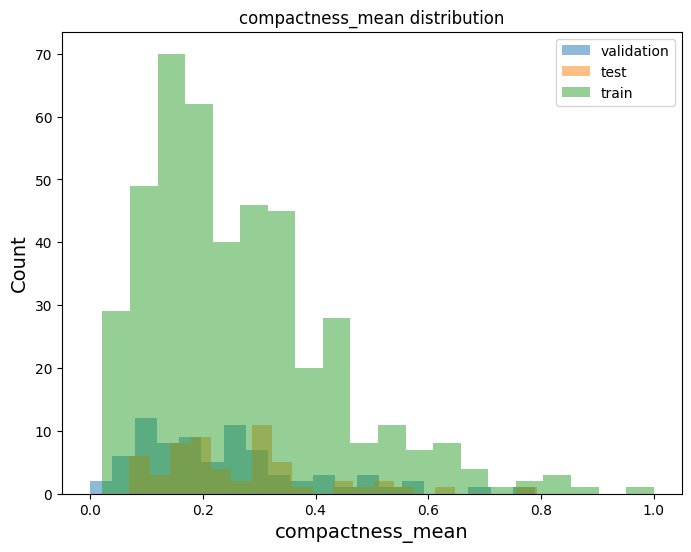

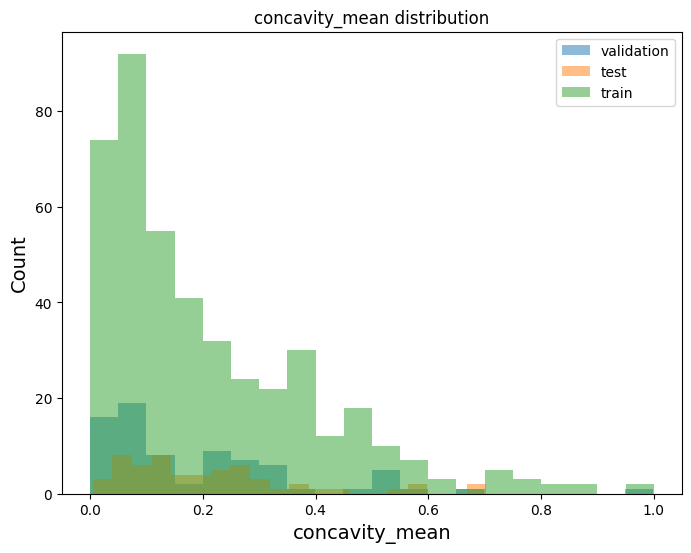

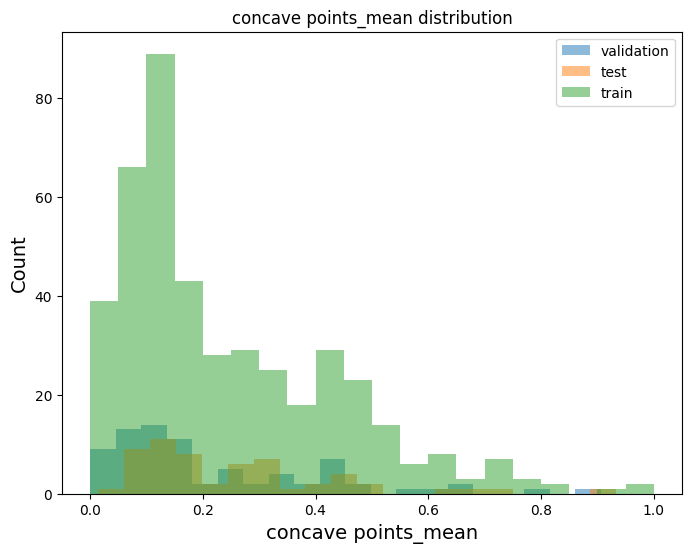

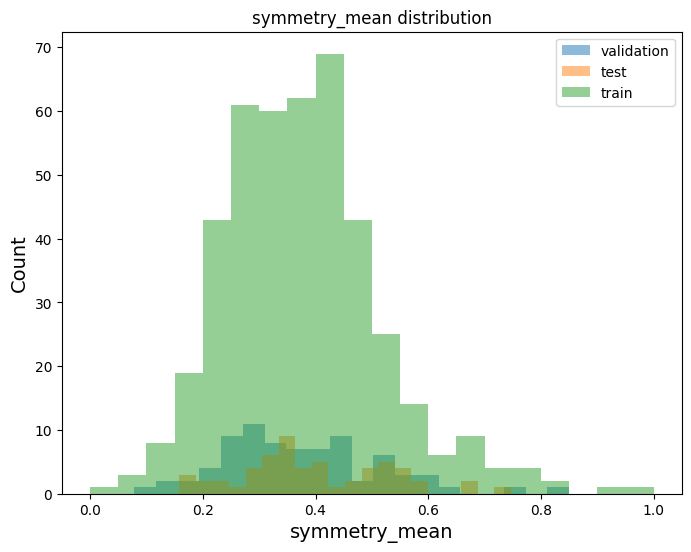

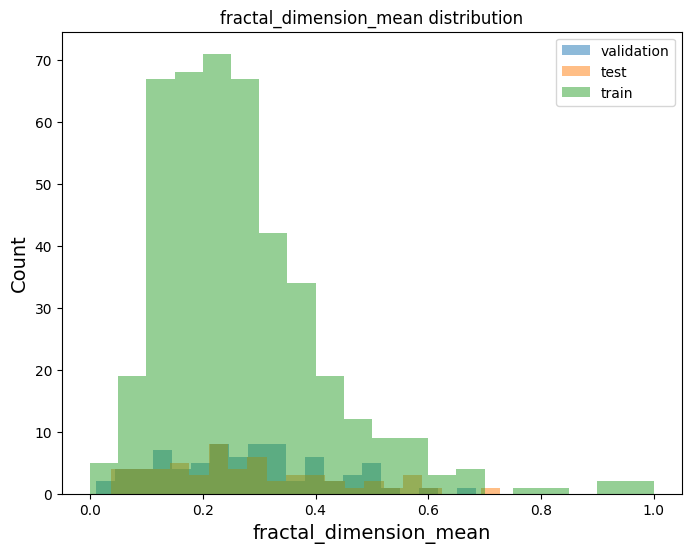

In [78]:
import matplotlib.pyplot as plt

# Selecting the independent variables
X_test_plot = X_test[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

X_val_plot = X_val[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

X_train_plot = X_train[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8,6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()

**Feature Selection:**

A specific set of features has been chosen for the model, including 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', and 'fractal_dimension_mean'.
These features are presumably important for predicting the target variable, 'diagnosis', in this context.

**Target Variable:**

The 'diagnosis' column is selected as the target variable for the model.

**Data Splitting Strategy:**

The dataset is initially split into two parts: 90% for the combined training and validation set, and 10% for the test set. This split ensures that a substantial portion of the data is used for training and validation, while a smaller, separate portion is reserved for the final evaluation of the model.
The combined training and validation set is further divided, with approximately 76.5% of the total data going to the training set and 13.5% to the validation set.

**Random State for Reproducibility:**

The random_state=1 parameter is used in both splits to ensure the reproducibility of the data split. This means that every time the code is run, it will produce the same split, which is important for consistent model training and evaluation.

**Purpose of Splitting:**

The training set is used to train the machine learning model.

The validation set helps in tuning the model parameters and in preventing overfitting.

The test set provides an unbiased evaluation of a final model fit on the training dataset.

This structured approach to splitting the data facilitates an effective and unbiased evaluation of the machine learning model's performance. It ensures that the model is tested on unseen data, reflecting its ability to generalize to new data.

The division of dataset in Test, train and validation sets appears to be distributed correctly for all the variables except for texture_mean, area_mean, concavity_mean distribution, concave_points_mean distribution, fractal_dimension_mean distribution







### **Method 3 - Using Gradient Boosting Classifier Results**

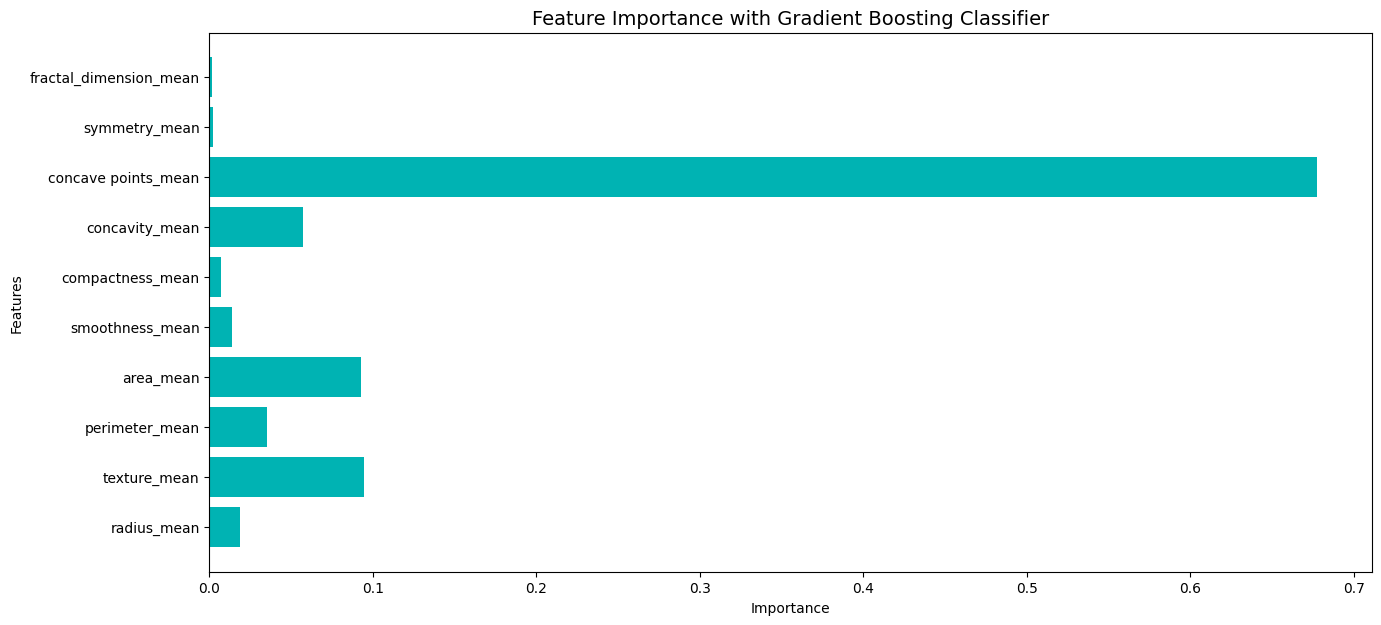

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Retrieve the feature names
feature_names = X_train.columns

# Create a visualization for feature importances
plt.figure(figsize=(15, 7))
plt.barh(feature_names, gb_model.feature_importances_, color="#00b3b3")
plt.title('Feature Importance with Gradient Boosting Classifier', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


'radius_mean' is the most important feature: It has the highest importance score by a significant margin, suggesting that it is the most influential feature in predicting the target variable according to the model.

'texture_mean' and 'perimeter_mean' also contribute significantly: These features have the next highest importance scores, indicating they play a substantial role in the model's decisions.

'area_mean' and 'smoothness_mean' have moderate importance: They contribute to the model, but their importance scores are notably lower than the top three features.

Lower importance features: 'compactness_mean', 'concavity_mean', 'concave points_mean', and 'symmetry_mean' have even lower importance scores, suggesting they have a smaller impact on the model's predictions.

'fractal_dimension_mean' has the least importance: It has the lowest score, indicating that, according to the model, it has the least impact on the prediction of the target variable.

**Remove outliers and keep outliers**

The Interquartile Range (IQR) method is a statistical technique employed for identifying and filtering out anomalies in data. IQR represents the spread between the 25th percentile (first quartile) and the 75th percentile (third quartile) in a dataset. Outliers are typically considered as data points that exist beyond 1.5 times the IQR above the third quartile or below the first quartile. These extreme values can either be excluded or subjected to additional scrutiny to decide whether they are pertinent to the analysis.

In [80]:
# calculates the 25th percentile of the data, represented by the 0.25 quantile
Q1 = X_train.quantile(0.25)
#calculates the 75th percentile of the data, represented by the 0.75 quantile
Q3 = X_train.quantile(0.75)
#calculates the IQR by subtracting the 25th percentile (Q1) from the 75th percentile (Q3)
IQR = Q3 - Q1
print(IQR)

radius_mean               0.202565
texture_mean              0.190565
perimeter_mean            0.200504
area_mean                 0.157243
smoothness_mean           0.167374
compactness_mean          0.204343
concavity_mean            0.248782
concave points_mean       0.271571
symmetry_mean             0.169192
fractal_dimension_mean    0.166070
dtype: float64


In [81]:
# Removing outliers from dataset
X_Train = X_train[~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
X_Train.shape


(378, 10)

### **Linear Regression Model**

In [82]:
# Required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividing the dataset into training and testing subsets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_set, y_train_set)

# Predicting the test set results
predicted_y = linear_model.predict(X_test_set)

# Calculating the performance metrics
mean_square_error = mean_squared_error(y_test_set, predicted_y)
r_squared_score = r2_score(y_test_set, predicted_y)

print(f'Mean Squared Error: {mean_square_error}')
print(f'R-Squared Value: {r_squared_score}')

# To display the predicted values
print(predicted_y)


Mean Squared Error: 0.07911450027043923
R-Squared Value: 0.6632256647511863
[ 2.52398380e-01  7.77554819e-01  7.19167381e-01  1.06170300e-01
  2.22378795e-02  1.54186174e+00  1.31809317e+00  6.39809411e-01
  5.57254620e-01  6.77141316e-02  3.30002079e-01  6.03866570e-01
  2.51257991e-01  7.83775056e-01  2.23445424e-02  1.31285823e+00
  1.85439183e-01 -4.62441105e-02 -4.65436572e-01  1.14203340e+00
  2.96744494e-01  2.02024733e-01  1.47250021e+00 -6.97292191e-02
  1.38819646e-01  4.43713346e-01  7.28462099e-02  2.63787455e-01
  1.30691519e-01  8.03732956e-01  1.81822125e-01 -3.08964079e-02
  6.35873085e-02  1.05276522e-01 -1.50180132e-02  1.37934388e-01
  4.54498490e-01  9.60221594e-02  7.07113218e-01  3.69035279e-01
 -6.92256584e-03  7.43656096e-01  2.16083138e-01  4.02943728e-02
  5.78129982e-01  9.87553616e-02 -7.11977803e-02  7.56741823e-04
  1.27618348e-01  9.88502670e-02  7.17967148e-01  1.19094574e+00
  3.83085281e-01  5.03497165e-01  4.30973774e-02  1.82454809e-01
  7.60570494e-

**Logistic Regression**

In [88]:
# Import the Logistic Regression class from scikit-learn
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression model
regr = LogisticRegression()

# Fit the model with the training data
regr.fit(X_train, y_train)

# Display the accuracy of the model on the training data
training_accuracy = regr.score(X_train, y_train) * 100
print('Accuracy on Training Data: ', training_accuracy)

# Display the accuracy of the model on the test data
test_accuracy = regr.score(X_test, y_test) * 100
print('Accuracy on Test Data: ', test_accuracy)


Accuracy on Training Data:  92.87356321839081
Accuracy on Test Data:  91.22807017543859


**Making Predictions**

In [90]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.07
Coefficient of determination: 0.70
R^2 score on training set = 0.6950888617555284


In [91]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.09
Coefficient of determination: 0.64
R^2 score on test set = 0.6355498721227621


In [92]:

# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.05
Coefficient of determination: 0.77
R^2 score on validation set = 0.7718518518518518


Evaluation Using Training Data Predictions: The code assesses the model's accuracy based on its predictions derived from the training dataset, X_train.

Mean Squared Error (MSE) as a Performance Indicator: The code calculates the Mean Squared Error, which represents the average of the squares of the differences between the actual and predicted values. A lower MSE value is indicative of a model that more accurately forecasts the data.

Coefficient of Determination (R²) for Model Fit: The R² score, also computed in the code, quantifies how effectively the model captures the variance in the data. An R² value of 1 signifies an impeccable model fit, while a value of 0 implies that the model fails to account for any variance in the data.

Interpreting R² Values: An R² value that approaches 1 is indicative of a model that perfectly predicts the dependent variable, whereas an R² value near 0 suggests the model is ineffective in explaining the variability in the dataset.

### **Understanding the important features**

In [94]:

import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Significance of Feature Importance Scores: Feature importance scores are crucial in understanding the contribution of each feature to the model's predictive capabilities. A higher score implies greater significance in influencing predictions.

Dominance of Perimeter_mean in Predictions: With an importance score of 0.5754, Perimeter_mean is identified as the most critical feature. This highlights that the average perimeter of cells is a key factor in determining the diagnosis.

Notable Role of Radius_mean: The feature Radius_mean, with an importance score of 0.1140, is the second most influential factor. This indicates that the average cell radius is also significant in the prediction process for breast cancer.

Moderate Influence of Texture_mean: Ranking third, Texture_mean has a lower importance score of 0.0175. While it contributes to the model's predictions, its impact is less pronounced compared to Perimeter_mean and Radius_mean.

Limited Impact of Area_mean: Area_mean has a relatively small importance score of 0.0053, suggesting its influence on the model's predictions is minimal.

Negligible Effect of Certain Features: Features like fractal_dimension_mean, symmetry_mean, concave points_mean, concavity_mean, compactness_mean, and smoothness_mean, all having an importance score of 0, show no significant effect on the model’s predictions in its current setup. This implies that these features are not key determinants in the model's decision-making process.

### **Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?**

In [96]:
percent=[0.01,0.05,0.1]
train_data = data.astype(float)
cols=list(train_data.columns)
all_rows=[]
all_cols=[]
for per in percent:
    nan_rows_size=int(per*len(train_data))
    random_cols=np.random.choice(np.arange(len(cols)),nan_rows_size,replace=True)
    random_rows=np.random.choice(np.arange(len(train_data)),nan_rows_size,replace=False)
    all_rows.append(random_rows)
    all_cols.append(random_cols)

#creating new dataframe with 1%,5% and 10% missing values
predictors_missing_1_percent=train_data.copy()
for r_index,c_index in zip(all_rows[0],all_cols[0]):
    predictors_missing_1_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_5_percent=train_data.copy()
for r_index,c_index in zip(all_rows[1],all_cols[1]):
    predictors_missing_5_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_10_percent=train_data.copy()
for r_index,c_index in zip(all_rows[2],all_cols[2]):
    predictors_missing_10_percent.at[r_index,cols[c_index]]=np.NaN


We plan to introduce missing values (NaNs) into our 'train_data' dataframe at three distinct levels: 1%, 5%, and 10% of the total dataset.

To do this, we will:

Create a list named "percent" containing the proportions 1%, 5%, and 10%.
Set up three empty lists, all_rows and all_cols, to keep records of the rows and columns that will be assigned NaN values.
For each percentage in the "percent" list:
a) Calculate nan_rows_size, the number of rows to contain NaNs, by multiplying the total row count of the dataframe by the current percentage.
b) Utilize numpy's random.choice() function to randomly select a corresponding number of row and column indices, which are then added to the all_rows and all_cols lists.
c) Generate three separate dataframes – predictors_missing_1_percent, predictors_missing_5_percent, and predictors_missing_10_percent – each representing a different level of missing data.
d) For each of these new dataframes: We start with a copy of the original 'train_data'. Then, using the previously chosen row and column indices, we introduce NaN values at the specified locations.

In [97]:
#Printing missing values
print('Number of missing values')
print('1% missing',predictors_missing_1_percent.isna().sum().sum())
print('5% missing',predictors_missing_5_percent.isna().sum().sum())
print('10% missing',predictors_missing_10_percent.isna().sum().sum())
train_data.head(5)


Number of missing values
1% missing 5
5% missing 28
10% missing 56


id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0    842302.0        1.0     0.521037      0.022658        0.545989   
1    842517.0        1.0     0.643144      0.272574        0.615783   
2  84300903.0        1.0     0.601496      0.390260        0.595743   
3  84348301.0        1.0     0.210090      0.360839        0.233501   
4  84358402.0        1.0     0.629893      0.156578        0.630986   

   area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0   0.363733         0.593753          0.792037        0.703140   
1   0.501591         0.289880          0.181768        0.203608   
2   0.449417         0.514309          0.431017        0.462512   
3   0.102906         0.811321          0.811361        0.565604   
4   0.489290         0.430351          0.347893        0.463918   

   concave points_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0             0.731113  ...         0.668310    0.450698          0.601136   
1             0.348757  ...         0.539818    0.435214          0.347553   
2             0.635686  ...         0.508442    0.374508          0.483590   
3             0.522863  ...         0.241347    0.094008          0.915472   
4             0.518390  ...         0.506948    0.341575          0.437364   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           0.619292         0.568610              0.912027        0.598462   
1           0.154563         0.192971              0.639175        0.233590   
2           0.385375         0.359744              0.835052        0.403706   
3           0.814012         0.548642              0.884880        1.000000   
4           0.172415         0.319489              0.558419        0.157500   

   fractal_dimension_worst  binary_diagnosis  intercept  
0                 0.418864               0.0        1.0  
1                 0.222878               0.0        1.0  
2                 0.213433               0.0        1.0  
3                 0.773711               0.0        1.0  
4                 0.142595               0.0        1.0  

[5 rows x 34 columns]

In [98]:
# Dropping NaN value rows from our 1%, 5% and 10% missing values dataframe and creating new dataframes
df_1_percent_without_nan=predictors_missing_1_percent.dropna()
df_5_percent_without_nan=predictors_missing_5_percent.dropna()
df_10_percent_without_nan=predictors_missing_10_percent.dropna()
df_1_percent_without_nan.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       564 non-null    float64
 1   diagnosis                564 non-null    float64
 2   radius_mean              564 non-null    float64
 3   texture_mean             564 non-null    float64
 4   perimeter_mean           564 non-null    float64
 5   area_mean                564 non-null    float64
 6   smoothness_mean          564 non-null    float64
 7   compactness_mean         564 non-null    float64
 8   concavity_mean           564 non-null    float64
 9   concave points_mean      564 non-null    float64
 10  symmetry_mean            564 non-null    float64
 11  fractal_dimension_mean   564 non-null    float64
 12  radius_se                564 non-null    float64
 13  texture_se               564 non-null    float64
 14  perimeter_se             5

We've introduced missing values (NaNs) into our original dataframe, resulting in three new versions: with 1%, 5%, and 10% of their data as NaNs.

To clean these, we've created three corresponding dataframes: "df_1_percent_without_nan", "df_5_percent_without_nan", and "df_10_percent_without_nan", by removing any rows containing NaNs using the dropna() method.



In [99]:
# Importing the metrics library from sklearn
from sklearn import metrics as sm

# Defining the function to calculate model performance scores
def performnce_calcuation(y_true,y_pred):
    acc=sm.accuracy_score(y_true,y_pred)
    log_loss=sm.log_loss(y_true,y_pred)
    auc=sm.roc_auc_score(y_true,y_pred)
    confusion_matrix=sm.confusion_matrix(y_true,y_pred)
    return acc,auc,log_loss,confusion_matrix

### **Impute Numerical values with Median and Categorical value with Mode**


In [100]:
num_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

cat_cols = ['diagnosis']

predict_impute_1 = pd.DataFrame()
predict_impute_5 = pd.DataFrame()
predict_impute_10 = pd.DataFrame()

# Imputing numerical columns with median
for col in num_cols:
    predict_impute_1[col] = predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].median())
    predict_impute_5[col] = predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].median())
    predict_impute_10[col] = predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].median())

# Imputing categorical columns with mode
for col in cat_cols:
    predict_impute_1[col] = predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].mode().iloc[0])
    predict_impute_5[col] = predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].mode().iloc[0])
    predict_impute_10[col] = predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].mode().iloc[0])



In [101]:
from sklearn import tree
from sklearn.model_selection import train_test_split

model_1 = tree.DecisionTreeClassifier(random_state=42, max_depth=4)

# For 1% imputed data
predictors = predict_impute_1.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_1['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train, y_train)
accuracy_1_te, auc_1_te, log_loss_1_te, cm_1_te = performnce_calcuation(y_test, model_1.predict(X_test))

# For 5% imputed data
predictors = predict_impute_5.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_5['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train, y_train)
accuracy_2_te, auc_2_te, log_loss_2_te, cm_2_te = performnce_calcuation(y_test, model_1.predict(X_test))

# For 10% imputed data
predictors = predict_impute_10.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_10['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train, y_train)
accuracy_3_te, auc_3_te, log_loss_3_te, cm_3_te = performnce_calcuation(y_test, model_1.predict(X_test))




In [102]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")


-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.92
AUC: 0.92
Log Loss: 3.02
Confusion Matrix:
 [[80  9]
 [ 3 51]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.92
AUC: 0.92
Log Loss: 3.02
Confusion Matrix:
 [[80  9]
 [ 3 51]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.92
AUC: 0.92
Log Loss: 3.02
Confusion Matrix:
 [[80  9]
 [ 3 51]]

-------------------------------


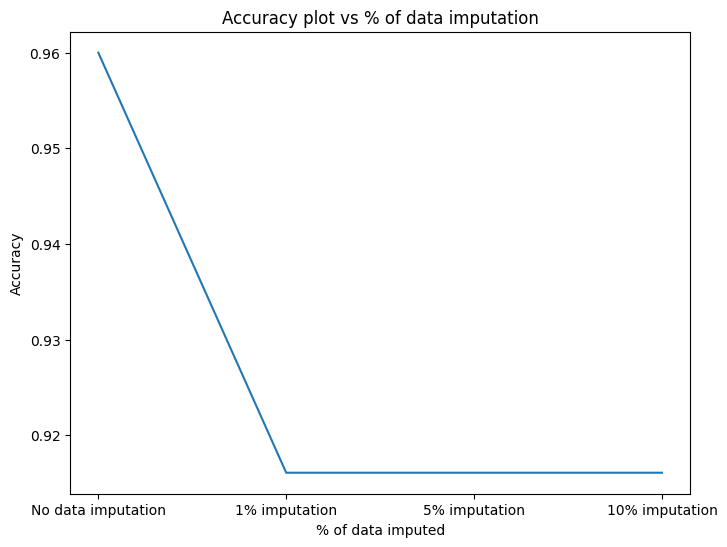

In [103]:
model_firssthand_accuracy = 0.96
np.random.seed(0)
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)


Observations
After doing median and mode imputation of missing values, here also we see that the accuracy keeps decreasing from 1% and then increases after more data imputation.

Our dataset orginally has minimal rows and drop in accuracy meaning we are loosing out on a lot of valuable information

### **Citations**
1.Many techniques used in this notebook have been inspired from the following github repositories

Owner - AI Skunkworks Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

2.The methods and parameters of the models and code corrections have been adapted from stackoverflow Link - https://stackoverflow.com

3.References have been taken from the seaborn webpage for charts and visualization Link - https://seaborn.pydata.org

4.Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples) https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

5.MICE Imputation Technique https://stackoverflow.com/questions/54059964/can-not-use-mice-from-fancyimputer-python

6.How to Identify the Most Important Predictor Variables in Regression Models https://towardsdatascience.com/how-to-perform-feature-selection-for-regression-problems-c928e527bbfa

Licensing


Copyright 2023 Lok Venkatesh


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.